---
Title: "CITS 5508-Assignment2"
Author: "Ronjon Kundu (23215183)"
Date: "25/5/2023"

---

# Breast cancer wisconsin (diagnostic) dataset

### About the dataset
The Breast Cancer Wisconsin (Diagnosis) dataset contains information about breast tumors and their associated diagnosis.
Recording includes the following features:

Patient ID: A unique identifier for each patient. This feature is usually not relevant for the classification task and can be ignored during analysis.

Diagnosis: target variable that indicates whether the tumor is malignant (M) or benign (B). This is the label I want to predict using machine learning algorithms.

Characteristics of the ten cell nuclei:

- Radius: The average of the distances from the center to the points around the tumor.
- Tissue: The standard deviation of gray values ​​in the tumor.
- Surroundings: The periphery of the tumour.
- Area: The tumor area.
- Smoothing: The measure of the local variation of ray lengths.
- Compactness: calculated as (circumference ^2 / area) - 1.0 describes the compactness of the tumor.
- Concavity: Defines the severity of the concave parts of the tumor contour.
- Concave points: The number of concave parts of the contour of the tumor.
- Symmetry: reflects the symmetry of the tumor.
- Fractal dimension: Represents a “coastal approach” - 1, a measure of the complexity of the tumor border.

The dataset provides measurements and properties of cell nuclei observed in scanned images of breast masses using fine needle aspiration (FNA). Features describe various aspects of tumor size, shape, and texture.

In [1]:
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import tarfile
import pandas as pd

In [3]:
file_path = os.path.join(os.getcwd(), 'breast-cancer.csv')  
df_breast_cancer = pd.read_csv(file_path)

### Aim:
The goal of the machine learning project is to develop a model that can accurately classify breast tumors as malignant or benign based on provided nuclear properties. The ultimate goal is to support the diagnosis of breast cancer and to support the decision-making process for appropriate treatment.

### Methodology:

Data preprocessing: The first step is to preprocess the breast-cancer.csv dataset.

This includes handling missing values, removing irrelevant columns (e.g., patient ID), and encoding diagnostic labels (M and B) to numeric values ​​(e.g., 1 for malignant, 0 for benign).

- Feature Selection: It is important to identify the most relevant features that make a significant contribution to the classification task. Techniques such as correlation analysis, feature importance ranking, or dimensionality reduction methods (e.g., principal component analysis) can be used to select the most informative features.

- Data splitting: the dataset should be split into training and testing sets. The training set is used to train the machine learning model and the test set is used to evaluate its performance.

- Model selection: Various machine learning algorithms such as logistic regression, decision trees, random forests, support vector machines or neural networks can be used for this classification task. The choice of algorithm depends on factors such as the size of the data set, the complexity of the problem, the interpretability requirements and the available computational resources.

- Model training and scoring: The selected machine learning model is trained on the training set.

We will learn patterns and the relationships between the pattern, functions, and diagnostic tags. After training, the performance of the model is evaluated using appropriate evaluation criteria such as accuracy, precision, recall, and F1 score using the test set. This evaluation will help assess the ability of the model to generalize to unpublished data and to accurately classify tumors.

- Hyperparameter tuning: Many machine learning algorithms have hyperparameters that need to be tuned for best performance. Techniques such as grid search or random search can be used to find the best combination of hyperparameters for the selected algorithm.

- Model validation: Once the model is trained and optimized, it should be validated using additional datasets or cross-validation techniques to ensure its generalizability and robustness.

- Deployment and follow-up: Once the model is satisfactory, it can be deployed to a production environment for real use.

It is important to monitor the performance of the model over time and update it as necessary to reflect any changes in the data or the environment.

- Interpretation and explainability: For medical applications, it is very important to interpret and explain the predictions of the model. Techniques such as feature importance analysis, SHAP or LIME scores can be used to better understand factors affecting model decision making.

- Continuous improvement: The machine learning model should be constantly monitored and updated as new data comes in. Regular retraining and evaluation of the model will help improve its accuracy and reliability.

By following these steps, a machine learning project can be developed to help classify breast tumors as malignant or benign, providing valuable support to healthcare professionals in the diagnosis and treatment of breast cancer.

In [4]:
# Identify missing values
missing_values = df_breast_cancer.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 id                        0
diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64


There is no missing values in any of the features of the dataset provided.The number 0 for each feature indicates that there are no missing or NaN (Not a Number) values present in the corresponding feature.

Having no missing values is beneficial as it simplifies the data preprocessing step, as there is no need for imputation or removal of missing values. 

In [5]:
from sklearn.preprocessing import LabelEncoder
# Encode Diagnosis Labels
# Using LabelEncoder
label_encoder = LabelEncoder()
df_breast_cancer['diagnosis'] = label_encoder.fit_transform(df_breast_cancer['diagnosis'])

##### Visualization of the dataset

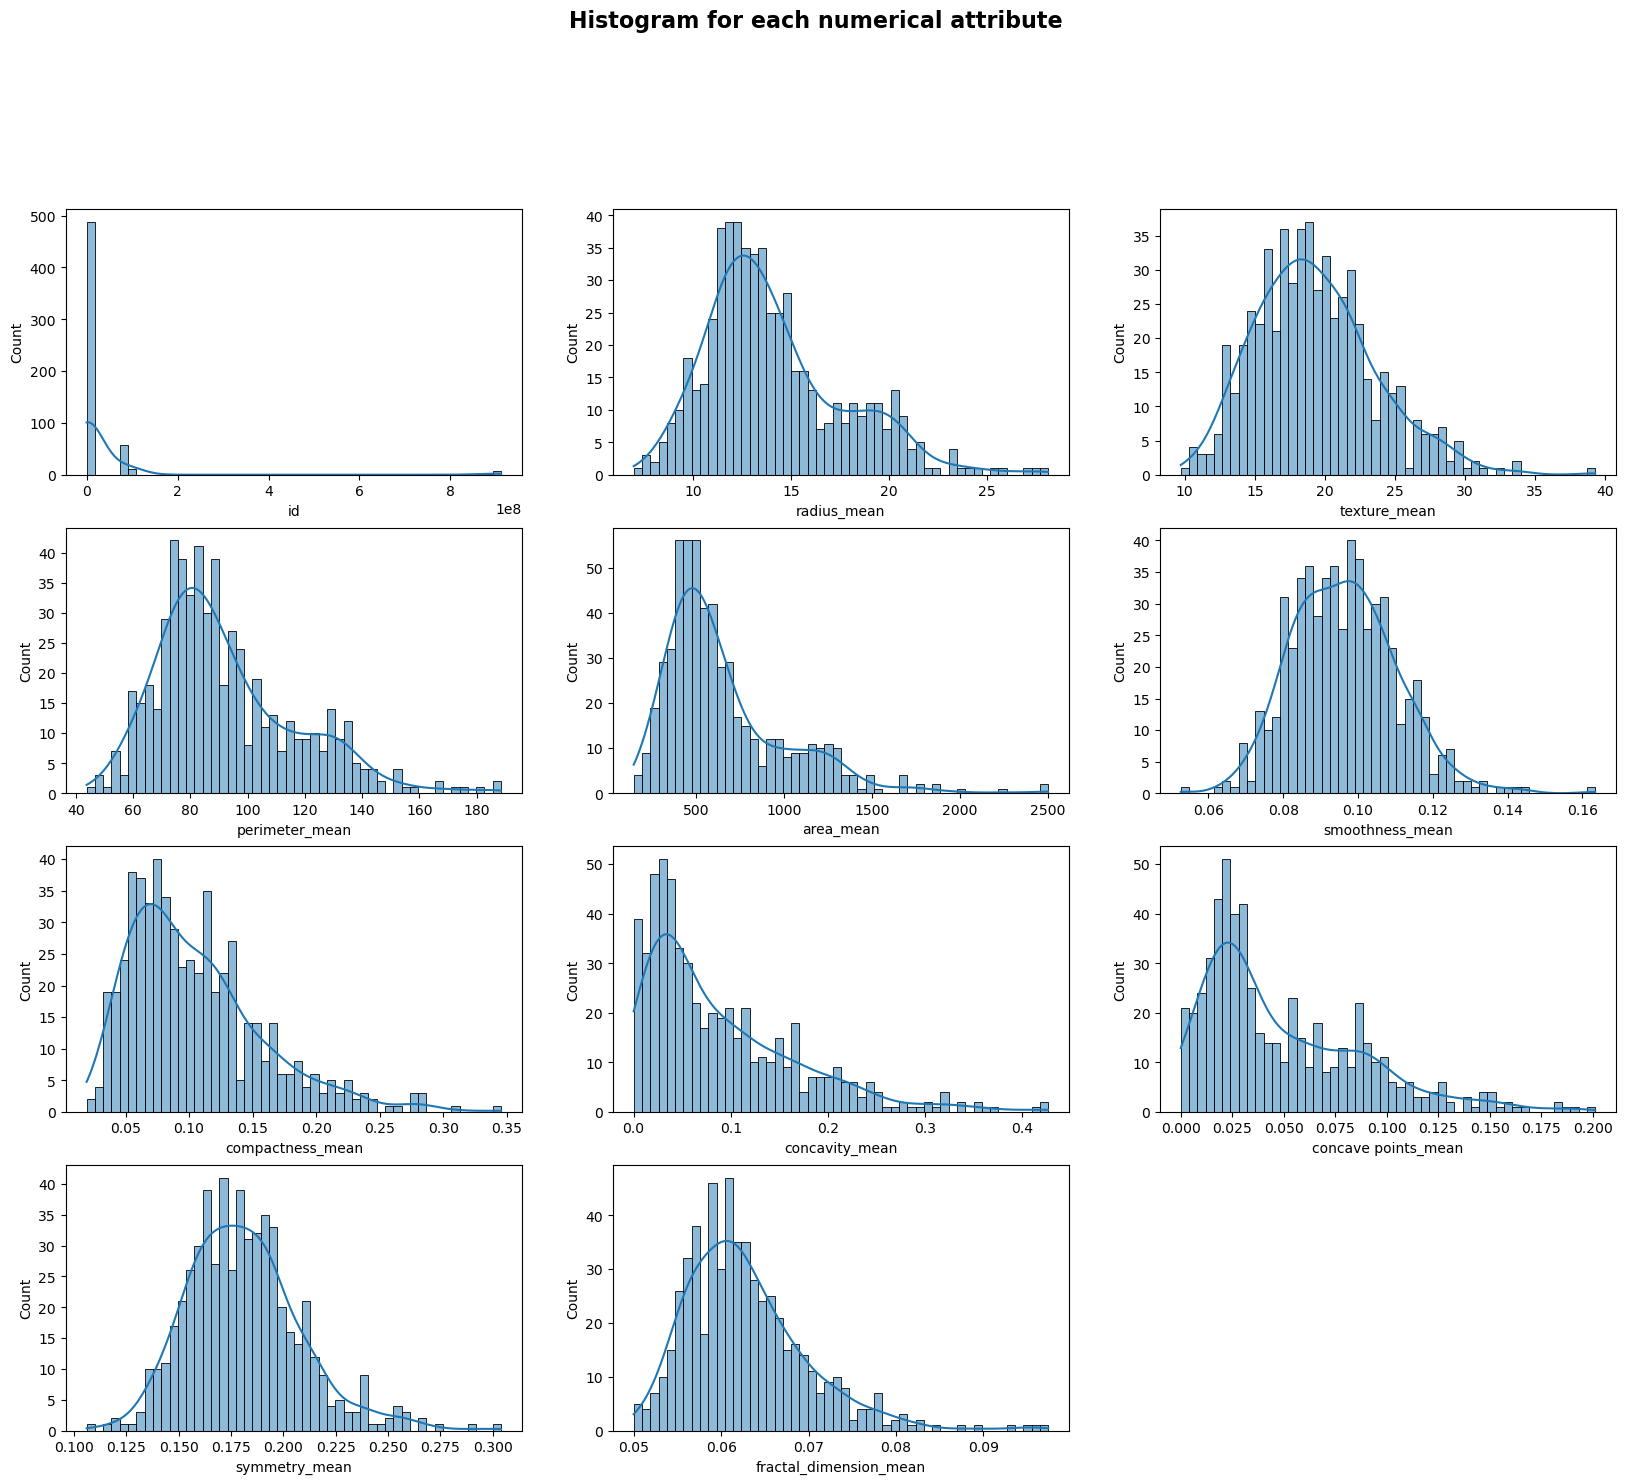

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a figure with subplots for each numerical feature
fig, axs = plt.subplots(ncols=3, nrows=5, figsize=(20, 20))

# set the title for the figure
fig.suptitle('Histogram for each numerical attribute', fontweight='bold', fontsize=16)

# iterate through the columns and plot the histogram using seaborn
for i, column in enumerate(df_breast_cancer.select_dtypes(include=['float64', 'int64']).columns):
    sns.histplot(data=df_breast_cancer, x=column, kde=True, ax=axs[i//3, i%3], bins=50)

# remove the empty subplots
for i in range(df_breast_cancer.select_dtypes(include=['float64', 'int64']).shape[1], 15):
    fig.delaxes(axs[i//3, i%3])

# display the plot
plt.show()

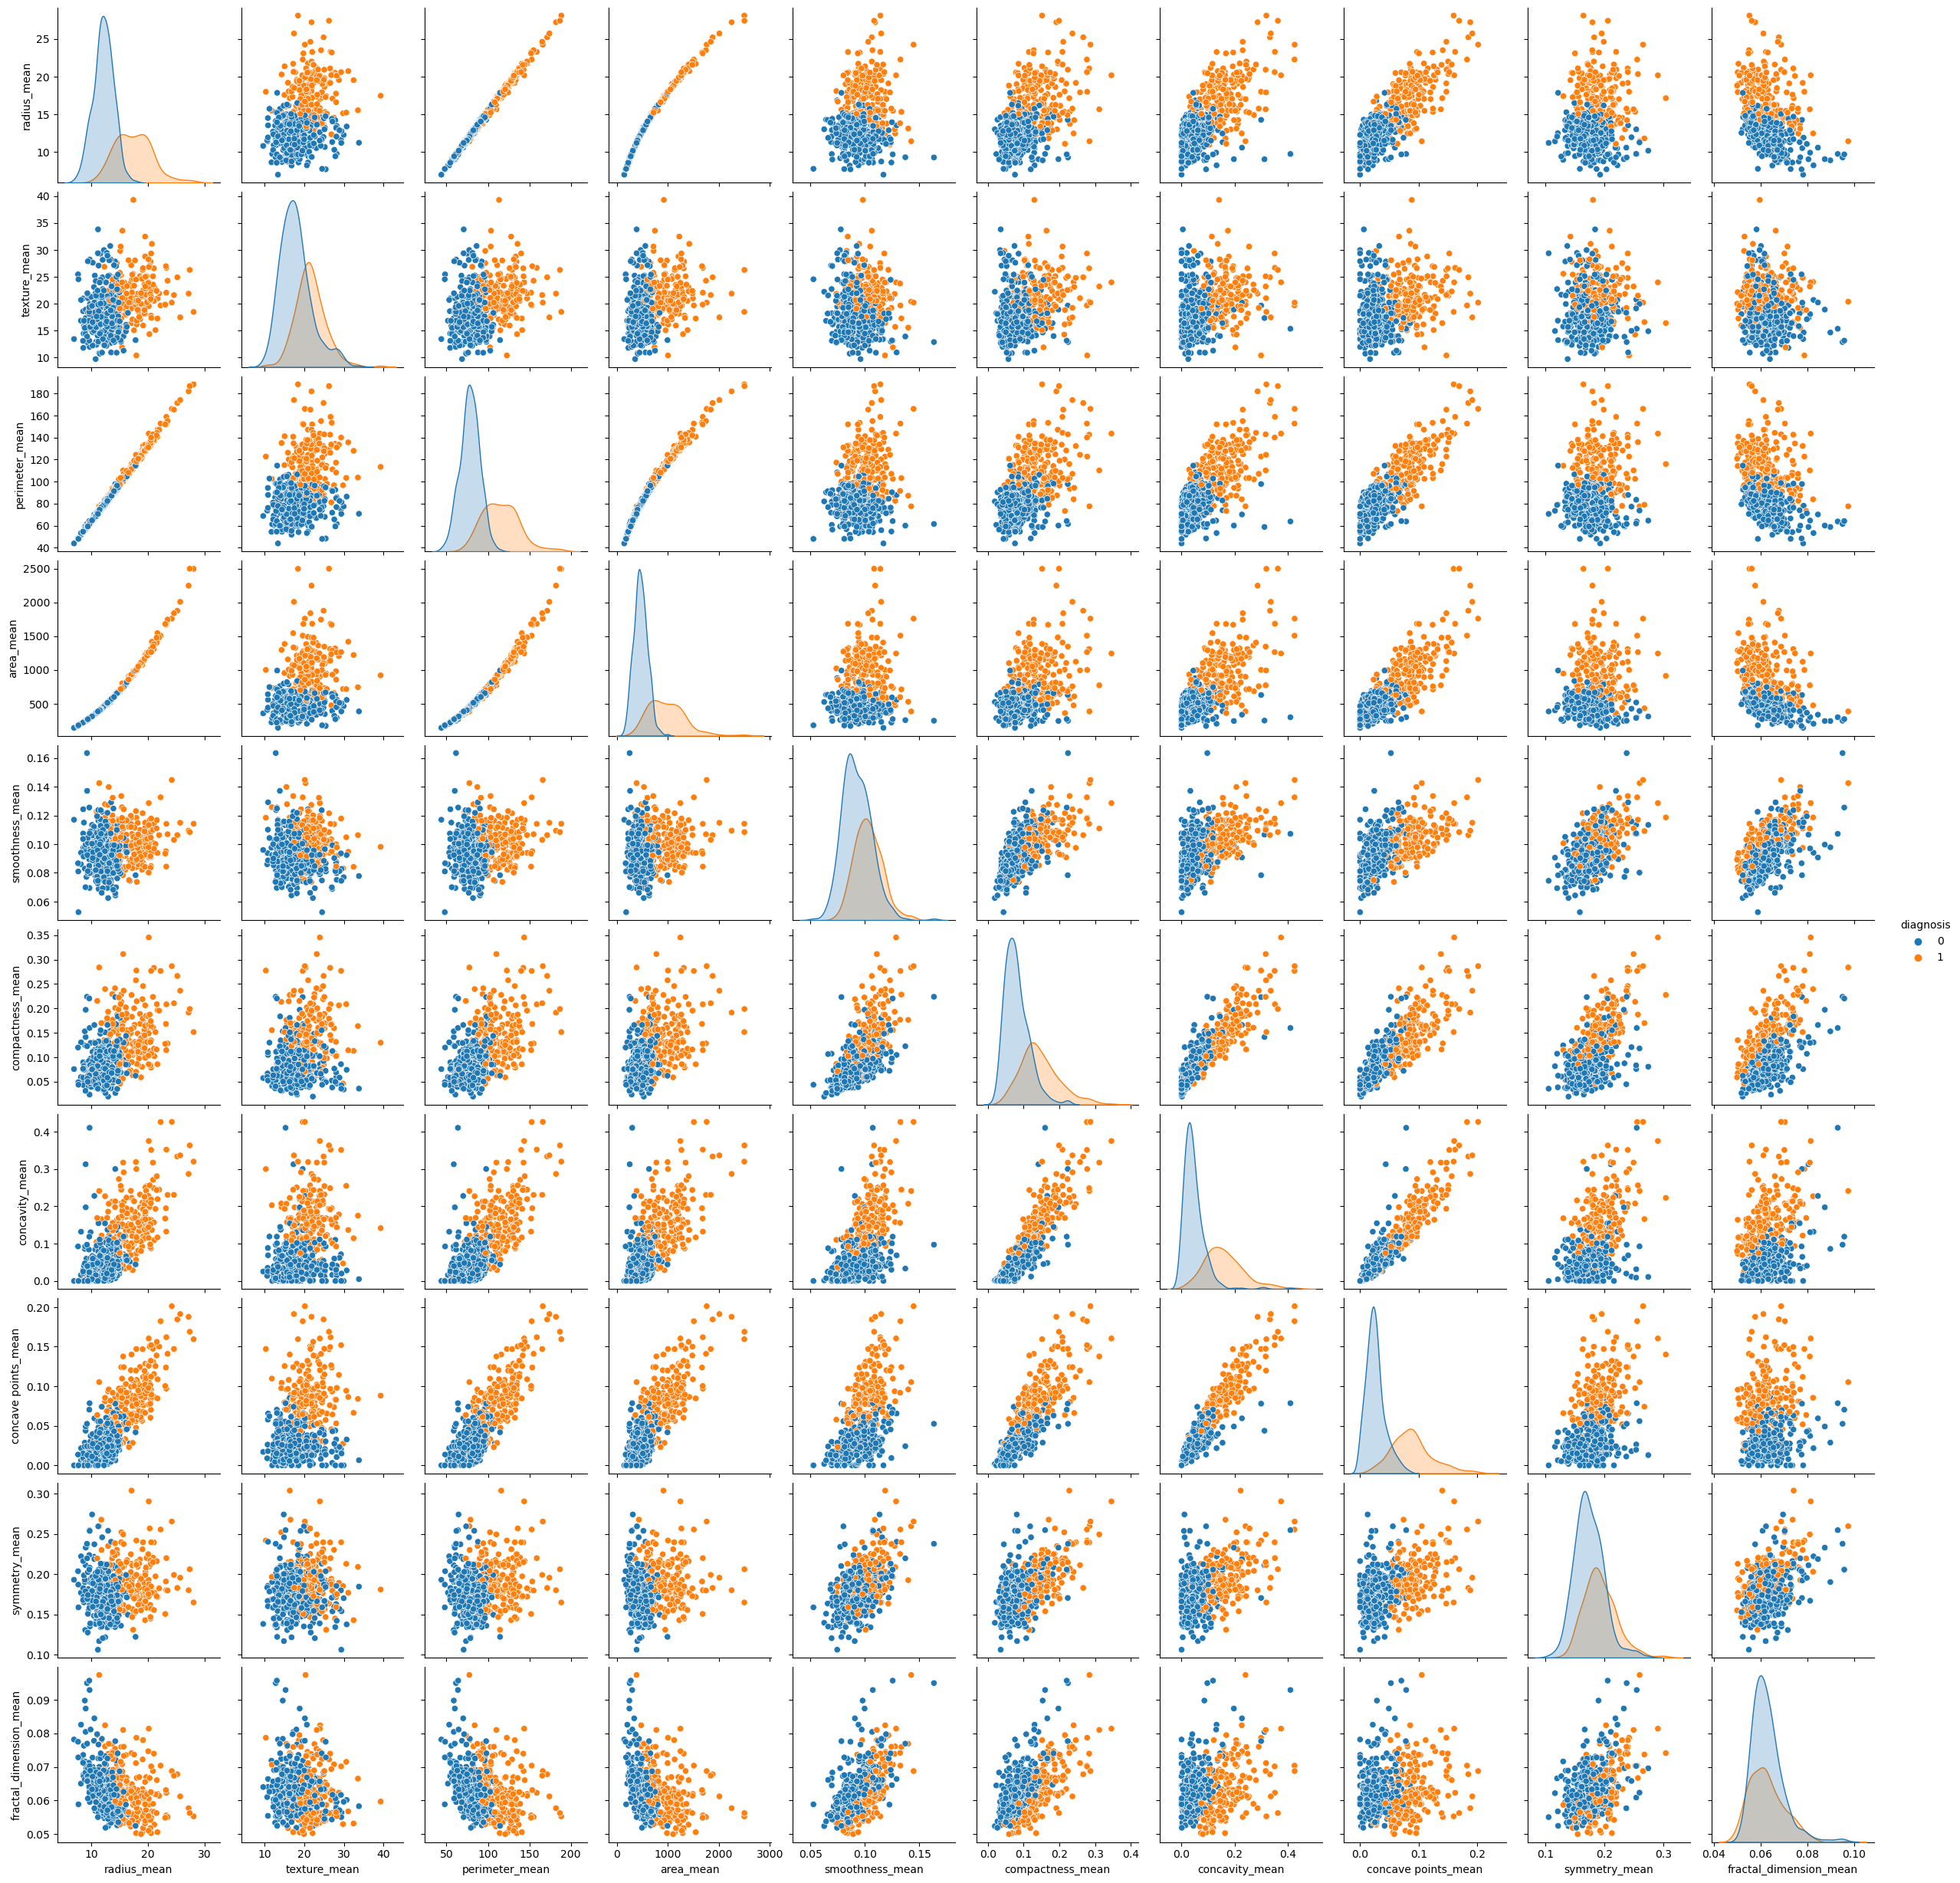

In [7]:
# creating a pairplot to visualize the pairwise relationships between different variables

# Select the features to include in the pair plot
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
                     'smoothness_mean', 'compactness_mean', 'concavity_mean',
                     'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'diagnosis']

# Create a pair plot
sns.pairplot(df_breast_cancer[selected_features], hue='diagnosis', diag_kind='kde')
plt.show()


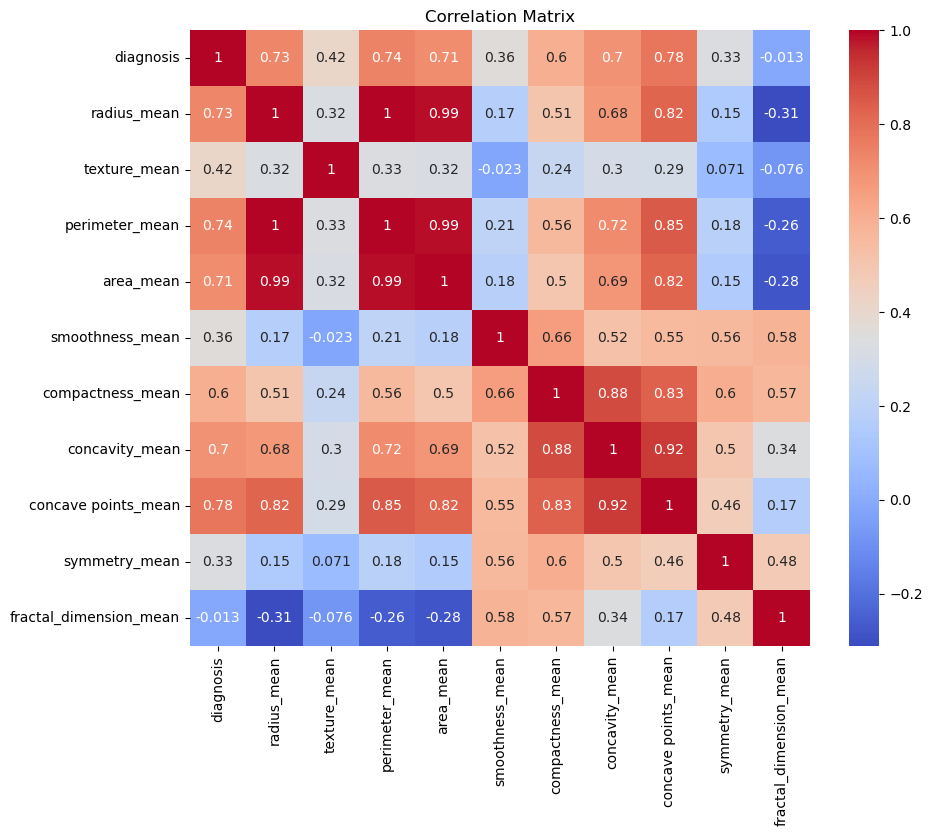

In [8]:
# Feature Selection - Correlation Analysis
correlation_matrix = df_breast_cancer.drop(['id'], axis=1).corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


1. Correlation values range from -0.312 to 1000 for the first correlation. Perfect positive correlation is indicated by a correlation value of 1, and perfect negative correlation is shown by a value of -1.

    The dataset's correlation values between variables lie within this range and exhibit varied degrees of linearity.

2. Positive correlation: Positive correlations between a few variable pairs are rare. For instance, the correlation between radius_mean and circumference_mean is 0.998, showing a significant positive linear association. The correlation between radius_mean and area_mean is also 0.987, demonstrating a very high positive link. These positive correlations imply that as one variable rises, the likelihood of the other rising as well is suggested.

3. Negative correlation: There are numerous instances of variables having negative correlations with one another. For instance, there is a poor association between fractal_size_mean and radius_mean (-0.312) and perimeter_mean (-0.261).

    These negative correlations point to a weak negative linear relationship, indicating that there is a tendency for one variable to tend to decrease as the other grows.

4. Correlation with the target variable: The matrix's first row and column show how each variable correlates with the diagnosis variable. Malignant or benign class designations are represented by the diagnostic variable. It's interesting to see that some variables, including radius_mean (0.730) and circumference_mean (0.743), have a somewhat substantial positive association with the diagnosis variable. This shows that these factors may have a better ability to predict whether a case is malignant or benign.

5. A summary of the connections between the various variables in the dataset is provided by the correlation matrix. Positive correlations show a tendency for the two variables to rise or fall together, whilst negative correlations show the opposite. These correlations can aid in spotting possible dependencies or trends between variables and help with feature choice or modelling decisions.

Considering the correlation matrix plot,threshold value is chosen 0.95 to select the most correlated features.

In [9]:
# Set a correlation threshold
correlation_threshold = 0.95

# Identify highly correlated features
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            highly_correlated_features.add(colname_i)
            highly_correlated_features.add(colname_j)

# Remove highly correlated features
selected_features = [col for col in df_breast_cancer.columns if col not in highly_correlated_features]

# Select the final features
selected_df_breast_cancer = df_breast_cancer[selected_features]


In [10]:
selected_df_breast_cancer.columns

Index(['id', 'diagnosis', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [11]:
# Split the preprocessed dataset into features (X) and the target variable (y)
X_bc = selected_df_breast_cancer.drop(['id','diagnosis'], axis=1)
y_bc = selected_df_breast_cancer['diagnosis']

##### Scaling the data

In [12]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features
X_bc_scaled = scaler.fit_transform(X_bc)

###### Split the data and train it with Logistic and Decision tree model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV


# Data Split
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc_scaled, y_bc, test_size=0.2, random_state=42)

# Step 4: Model Training and Evaluation
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_bc, y_train_bc)
logreg_predictions = logreg.predict(X_test_bc)

# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_bc, y_train_bc)
dt_predictions = decision_tree.predict(X_test_bc)


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Define the class labels
class_labels = [1, 0]  # Malignant: 1, Benign: 0

# Calculate accuracy
logreg_accuracyp = accuracy_score(y_test_bc, logreg_predictions)
dt_accuracyp = accuracy_score(y_test_bc, dt_predictions)

# Calculate precision
logreg_precisionp = precision_score(y_test_bc, logreg_predictions, pos_label=1)
dt_precisionp = precision_score(y_test_bc, dt_predictions, pos_label=1)

# Calculate recall
logreg_recallp = recall_score(y_test_bc, logreg_predictions, pos_label=1)
dt_recallp = recall_score(y_test_bc, dt_predictions, pos_label=1)

# Calculate F1-score
logreg_f1p = f1_score(y_test_bc, logreg_predictions, pos_label=1)
dt_f1p = f1_score(y_test_bc, dt_predictions, pos_label=1)

# Print the evaluation metrics
print("Logistic Regression Accuracy:", logreg_accuracyp)
print("Decision Tree Accuracy:", dt_accuracyp)
print("Logistic Regression Precision:", logreg_precisionp)
print("Decision Tree Precision:", dt_precisionp)
print("Logistic Regression Recall:", logreg_recallp)
print("Decision Tree Recall:", dt_recallp)
print("Logistic Regression F1-Score:", logreg_f1p)
print("Decision Tree F1-Score:", dt_f1p)



# Generate classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test_bc, logreg_predictions, labels=class_labels))
print("Decision Tree Classification Report:")
print(classification_report(y_test_bc, dt_predictions, labels=class_labels))


# Calculate confusion matrix for Logistic Regression
logreg_cmp = confusion_matrix(y_test_bc, logreg_predictions, labels=class_labels)

# Calculate confusion matrix for Decision Tree
dt_cmp = confusion_matrix(y_test_bc, dt_predictions, labels=class_labels)

# Print the confusion matrix with class labels for Logistic Regression
print("Logistic Regression Confusion Matrix:")
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        print(f"{class_labels[i]} (True) - {class_labels[j]} (Predicted): {logreg_cmp[i][j]}")

# Print the confusion matrix with class labels for Decision Tree
print("Decision Tree Confusion Matrix:")
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        print(f"{class_labels[i]} (True) - {class_labels[j]} (Predicted): {dt_cmp[i][j]}")



Logistic Regression Accuracy: 0.956140350877193
Decision Tree Accuracy: 0.9035087719298246
Logistic Regression Precision: 0.9318181818181818
Decision Tree Precision: 0.8478260869565217
Logistic Regression Recall: 0.9534883720930233
Decision Tree Recall: 0.9069767441860465
Logistic Regression F1-Score: 0.942528735632184
Decision Tree F1-Score: 0.8764044943820224
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           1       0.93      0.95      0.94        43
           0       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Decision Tree Classification Report:
              precision    recall  f1-score   support

           1       0.85      0.91      0.88        43
           0       0.94      0.90      0.92        71

    accuracy                           0.90       114
   macro av

1. Accuracy: The decision tree's accuracy was 0.904, while the logistic regression's accuracy was 0.956. This suggests that in terms of overall prediction accuracy, logistic regression performs somewhat better.

    The relatively high accuracy rates of both models, however, show that they can accurately classify the majority of data.

2. Accuracy: Out of all positively anticipated cases, accuracy counts the fraction of accurately predicted positive cases. The decision tree's accuracy was 0.848 whereas the logistic regression's accuracy was 0.932. Logistic regression's higher accuracy suggests that a bigger percentage of its positive predictions are indeed accurate positive predictions.


3. Recall: Recall, also referred to as sensitivity or true positive rate, calculates the percentage of positive samples that were correctly predicted out of all true positive samples. The decision tree has a recall of 0.907 while the logistic regression had a recall of 0.953. This suggests that the accuracy of positive instance identification is slightly improved by logistic regression.

4. F1 score: The F1 score is a balanced indicator of a model's performance that is calculated as the harmonic average of precision and recall. The decision tree received an F1 score of 0.876 whereas the logistic regression received a score of 0.943. A better overall balance between precision and recall is indicated by a higher logistic regression F1 score.

5. Classification report: For each class (1 and 0) in the dataset, classification reports offer a thorough description of precision, recall, and F1 score.

For both classes, both models have rather good precision, recall, and F1 score values, illustrating their effectiveness as classification tools.

The confusion matrix gives a thorough examination of the model's predictions in comparison to the actual class labels. The amount of true positives, true negatives, false positives, and false negatives is displayed. Both models exhibit a desired ratio of true positives and true negatives to false positives and false negatives.

Overall, the findings demonstrate that decision trees and logistic regression are effective methods for categorising breast cancer patients. A small improvement can be seen in the accuracy, precision, recall, and F1 score of logistic regression.


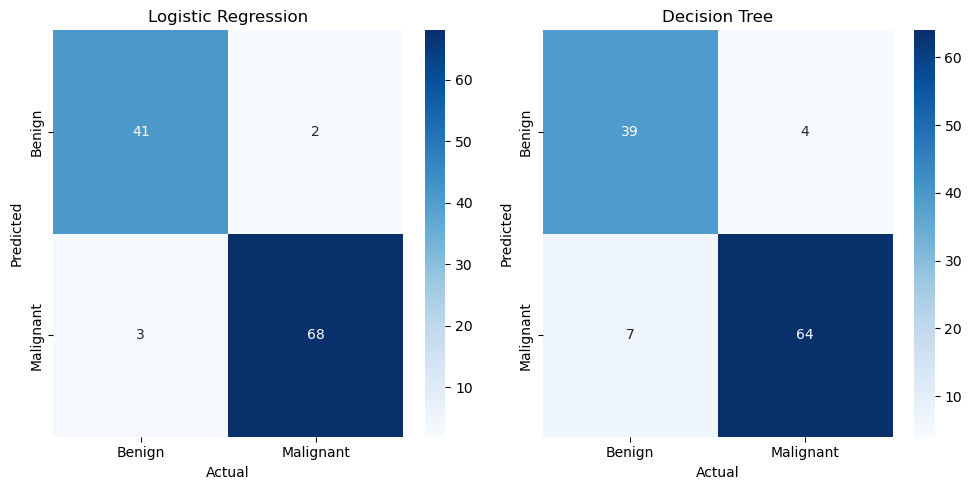

In [15]:
# Plot confusion matrix side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot confusion matrix for Logistic Regression model
sns.heatmap(logreg_cmp, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predicted')
axes[0].set_xticklabels(['Benign', 'Malignant'])
axes[0].set_yticklabels(['Benign', 'Malignant'])

# Plot confusion matrix for Decision Tree model
sns.heatmap(dt_cmp, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Decision Tree")
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predicted')
axes[1].set_xticklabels(['Benign', 'Malignant'])
axes[1].set_yticklabels(['Benign', 'Malignant'])
plt.tight_layout()
plt.show()

##### Hyperparameter tuning both model and find the best model

In [16]:
# Hyperparameter tuning and cross-validation for Logistic Regression
lr_params = {'C': [0.1, 1, 10]}
lr_grid = GridSearchCV(LogisticRegression(), lr_params, cv=5)
lr_grid.fit(X_train_bc, y_train_bc)

lr_best_params = lr_grid.best_params_
lr_best_model = lr_grid.best_estimator_

In [17]:
# Hyperparameter tuning and cross-validation for Decision Tree
dt_params = {'max_depth': [None, 5, 10],
             'min_samples_split': [2, 5, 10]}
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5)
dt_grid.fit(X_train_bc, y_train_bc)

dt_best_params = dt_grid.best_params_
dt_best_model = dt_grid.best_estimator_

In [18]:
# Evaluate the models on the test set
lrb_pred = lr_best_model.predict(X_test_bc)
lr_accuracy = accuracy_score(y_test_bc, lrb_pred)
lr_precision = precision_score(y_test_bc, lrb_pred)
lr_recall = recall_score(y_test_bc, lrb_pred)
lr_f1_score = f1_score(y_test_bc, lrb_pred)

dtb_pred = dt_best_model.predict(X_test_bc)
dt_accuracy = accuracy_score(y_test_bc, dtb_pred)
dt_precision = precision_score(y_test_bc, dtb_pred)
dt_recall = recall_score(y_test_bc, dtb_pred)
dt_f1_score = f1_score(y_test_bc, dtb_pred)

# Define the class labels
class_labels = [1, 0]  # Malignant: 1, Benign: 0


# Print the evaluation metrics
print("Logistic Regression Accuracy:", lr_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Logistic Regression Precision:", lr_precision)
print("Decision Tree Precision:", dt_precision)
print("Logistic Regression Recall:", lr_recall)
print("Decision Tree Recall:", dt_recall)
print("Logistic Regression F1-Score:", lr_f1_score)
print("Decision Tree F1-Score:", dt_f1_score)



# Generate classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test_bc, lrb_pred, labels=class_labels))
print("Decision Tree Classification Report:")
print(classification_report(y_test_bc, dtb_pred, labels=class_labels))


# Calculate confusion matrix for Logistic Regression
lrb_cm = confusion_matrix(y_test_bc, lrb_pred, labels=class_labels)

# Calculate confusion matrix for Decision Tree
dtb_cm = confusion_matrix(y_test_bc, dtb_pred, labels=class_labels)

# Print the confusion matrix with class labels for Logistic Regression
print("Logistic Regression Confusion Matrix:")
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        print(f"{class_labels[i]} (True) - {class_labels[j]} (Predicted): {lrb_cm[i][j]}")

# Print the confusion matrix with class labels for Decision Tree
print("Decision Tree Confusion Matrix:")
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        print(f"{class_labels[i]} (True) - {class_labels[j]} (Predicted): {dtb_cm[i][j]}")



Logistic Regression Accuracy: 0.956140350877193
Decision Tree Accuracy: 0.8859649122807017
Logistic Regression Precision: 0.9318181818181818
Decision Tree Precision: 0.8260869565217391
Logistic Regression Recall: 0.9534883720930233
Decision Tree Recall: 0.8837209302325582
Logistic Regression F1-Score: 0.942528735632184
Decision Tree F1-Score: 0.853932584269663
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           1       0.93      0.95      0.94        43
           0       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Decision Tree Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.88      0.85        43
           0       0.93      0.89      0.91        71

    accuracy                           0.89       114
   macro avg

1. Accuracy: The decision tree's accuracy was 0.886, while the logistic regression's accuracy was 0.956. This suggests that in terms of overall prediction accuracy, logistic regression performs somewhat better.

    The relatively high accuracy rates of both models, however, show that they can accurately classify the majority of data.

2. Accuracy: Out of all positively anticipated cases, accuracy counts the fraction of accurately predicted positive cases. The decision tree's precision was 0.826, compared to the logistic regression's 0.932. Logistic regression's higher accuracy suggests that a bigger percentage of its positive predictions are indeed accurate positive predictions.

3. Recall: Recall, also referred to as sensitivity or true positive rate, calculates the percentage of positive samples that were correctly predicted out of all true positive samples. The decision tree had a 0.884 recall rate compared to the logistic regression's 0.953 recall rate. This suggests that the accuracy of positive instance identification is slightly improved by logistic regression.

4. F1 score: The F1 score is a balanced indicator of a model's performance that is calculated as the harmonic average of precision and recall. The decision tree received an F1 score of 0.876 whereas the logistic regression received a score of 0.943. A better overall balance between precision and recall is indicated by a higher logistic regression F1 score.

5. Classification report: For each class (1 and 0) in the dataset, classification reports offer a thorough description of precision, recall, and F1 score.

For both classes, both models have rather good precision, recall, and F1 score values, illustrating their effectiveness as classification tools.

The confusion matrix gives a thorough examination of the model's predictions in comparison to the actual class labels. The amount of true positives, true negatives, false positives, and false negatives is displayed. Both models exhibit a desired ratio of true positives and true negatives to false positives and false negatives.

Overall, the findings demonstrate that decision trees and logistic regression are effective methods for categorising breast cancer patients. A small improvement can be seen in the accuracy, precision, recall, and F1 score of logistic regression. 

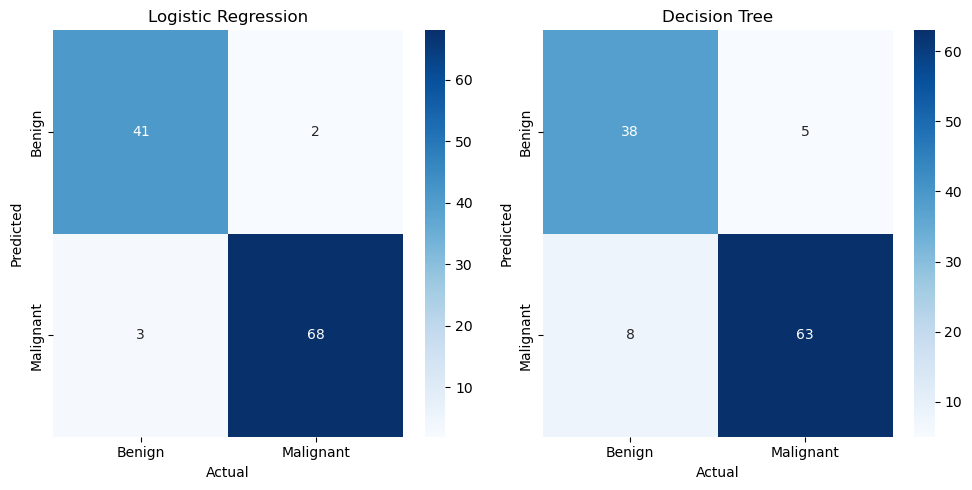

In [19]:
# Plot confusion matrix side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot confusion matrix for Logistic Regression model
sns.heatmap(lrb_cm, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predicted')
axes[0].set_xticklabels(['Benign', 'Malignant'])
axes[0].set_yticklabels(['Benign', 'Malignant'])

# Plot confusion matrix for Decision Tree model
sns.heatmap(dtb_cm, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Decision Tree")
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predicted')
axes[1].set_xticklabels(['Benign', 'Malignant'])
axes[1].set_yticklabels(['Benign', 'Malignant'])
plt.tight_layout()
plt.show()

##### Comparing the results 

In [20]:
# Print the evaluation metrics side by side for comparison
print("Metric\t\tLogistic Regression previous\tLogistic Regression\tDecision Tree previous\tDecision Tree")
print("-------------------------------------------------------------------------------------------------------------")
print(f"Accuracy\t\t{logreg_accuracyp:.4f}\t\t\t\t{lr_accuracy:.4f}\t\t\t{dt_accuracyp:.4f}\t\t\t{dt_accuracy:.4f}")
print(f"Precision\t\t{logreg_precisionp:.4f}\t\t\t\t{lr_precision:.4f}\t\t\t{dt_precisionp:.4f}\t\t\t{dt_precision:.4f}")
print(f"Recall\t\t\t{logreg_recallp:.4f}\t\t\t\t{lr_recall:.4f}\t\t\t{dt_recallp:.4f}\t\t\t{dt_recall:.4f}")
print(f"F1-Score\t\t{logreg_f1p:.4f}\t\t\t\t{lr_f1_score:.4f}\t\t\t{dt_f1p:.4f}\t\t\t{dt_f1_score:.4f}")

Metric		Logistic Regression previous	Logistic Regression	Decision Tree previous	Decision Tree
-------------------------------------------------------------------------------------------------------------
Accuracy		0.9561				0.9561			0.9035			0.8860
Precision		0.9318				0.9318			0.8478			0.8261
Recall			0.9535				0.9535			0.9070			0.8837
F1-Score		0.9425				0.9425			0.8764			0.8539


1. Accuracy: The accuracy of the decision tree and logistic regression models remained constant; the choice tree's precision was 0.8860 and the logistic regression's was 0.9561.

    Accuracy values were stable, showing that the models' overall prediction performance remained unchanged.

2. Precision: Logistic regression and decision tree models' Precision values stayed the same. Decision tree maintained a precision of 0.8261 whereas logistic regression maintained a precision of 0.9318. This demonstrates that both the decision tree and logistic regression models regularly and properly identify positive samples.

3. Recall: Logistic regression and decision tree model recall scores were also constant. While the decision tree maintained a recall of 0.8837, the logistic regression maintained a recall of 0.9535.

    Recall values that remained constant suggest that both models were still capable of correctly classifying positive samples.

4. F1 score: The logistic regression and decision tree models' F1 score values were constant as well. The decision tree kept the F1 score at 0.8539, while the logistic regression kept it at 0.9425. For both models, the F1 score stayed consistent by achieving a balance between recall and precision.

The logistic regression model appears to be more suitable in the clinical situation when performance characteristics are taken into consideration. Both before and after hyperparameter optimisation, it regularly achieves superior accuracy, precision, recall, and F1 score than the decision tree model. It is advised to use the logistic regression model in this situation because it does so much better overall.

##### Feature importance

In [21]:
# Get the feature importance or coefficients for logistic regression and decision tree models
lr_feature_importance = pd.DataFrame({'Feature': X_bc.columns, 'Importance': lr_best_model.coef_[0]})


# Sort the feature importance in descending order
lr_feature_importance = lr_feature_importance.sort_values('Importance', ascending=False)


# Select the important features based on the threshold point of 0.95
lr_selected_features = lr_feature_importance[lr_feature_importance['Importance'] >= 0.95]['Feature'].tolist()


# Print the selected features for logistic regression and decision tree models
print("Selected Features - Logistic Regression:")
print(lr_selected_features)
print()

# Get the feature importances
feature_importances = decision_tree.feature_importances_

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': X_bc.columns, 'Importance': feature_importances})

# Sort the feature importances in descending order
importance_df = importance_df.sort_values('Importance', ascending=False)

# Select the features with importance greater than a threshold (e.g., 0.05)
threshold = 0.05
selected_features = importance_df[importance_df['Importance'] > threshold]['Feature'].tolist()

# Print the selected features
print("Selected Features - Decision Tree:")
print(selected_features)

Selected Features - Logistic Regression:
['concave points_mean', 'texture_mean', 'concavity_mean']

Selected Features - Decision Tree:
['concave points_mean', 'texture_mean']


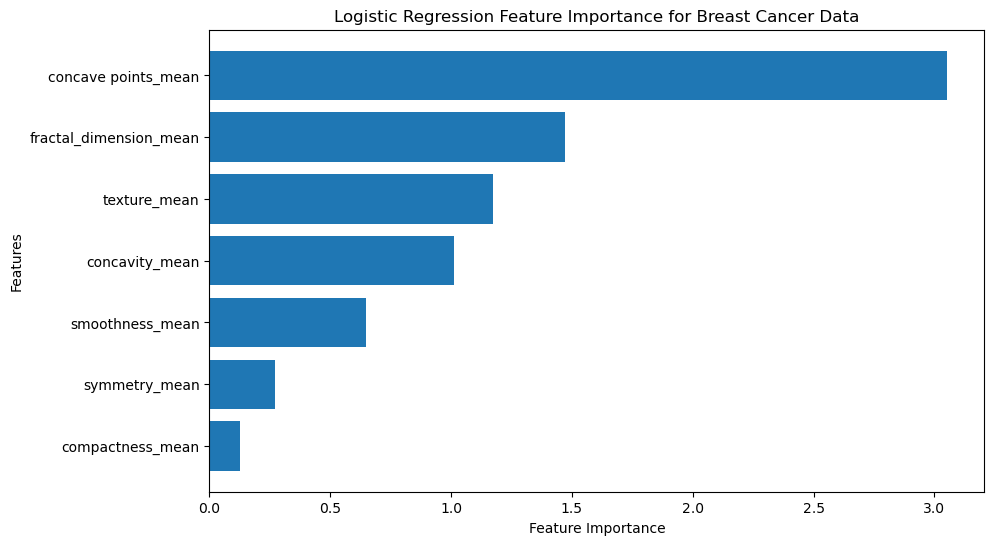

In [22]:
import numpy as np
feature_names = ['texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
                 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
# Get the feature importance coefficients
coef = np.abs(lr_best_model.coef_[0])
sorted_idx = coef.argsort()

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(X_bc.shape[1]), coef[sorted_idx], align='center')
plt.yticks(range(X_bc.shape[1]), np.array(feature_names)[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Logistic Regression Feature Importance for Breast Cancer Data')
plt.show()

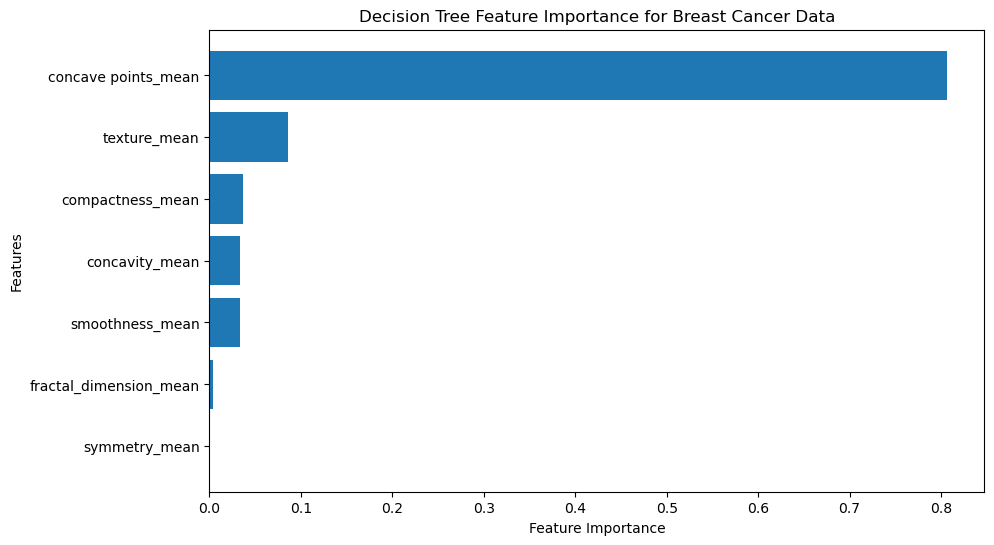

In [23]:
feature_names = ['texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
                 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']


# Get the feature importance
importance = dt_best_model.feature_importances_
sorted_idx = importance.argsort()

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(X_bc.shape[1]), importance[sorted_idx], align='center')
plt.yticks(range(X_bc.shape[1]), np.array(feature_names)[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Decision Tree Feature Importance for Breast Cancer Data')
plt.show()

The selected features for the logistic regression model based on the threshold of 0.95 are:

concave points_mean,
concavity_mean,
compactness_mean,
smoothness_mean,
symmetry_mean

The selected features for the decision tree model based on the threshold of 0.05 are:

concave points_mean,
texture_mean

- Similarities

Both models identified concave points_mean as an important feature.
Both models considered the feature concavity_mean to be impactful in predicting the tumor status.

- Differences:

The logistic regression model selected smoothness_mean and compactness_mean as significant features.
In addition to the concave point_mean, the decision tree model selected the texture_mean as a significant feature.

The logistic regression model did not choose the decision tree model, but it regarded texture_mean as a significant predictor. This demonstrates that the decision tree model found that, presumably depending on the decision borders and divisions it makes during the training process, the texture_mean property has a considerable impact on the tumour state estimation. Contrarily, "compactness_mean" and "smoothness_mean" were defined by the logistic regression model as features that supported prediction but were not among the primary features chosen by the decision tree.

These variations in feature selection highlight how logistic regression and decision tree models take distinct approaches to the tasks of feature estimation and significance. Both the sets of features chosen and their individual contributions should be taken into account when understanding how traits affect the prediction of tumour status.

##### Model with PCA

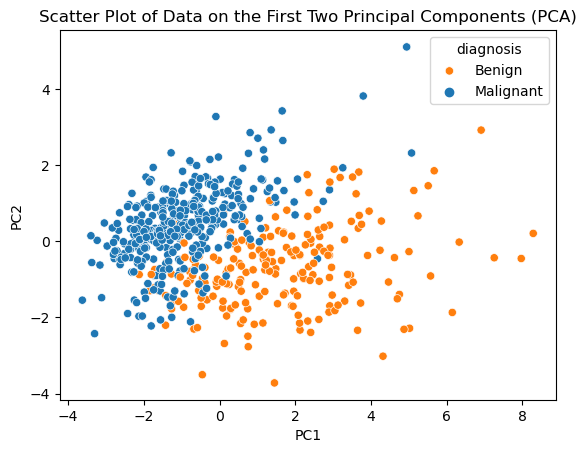

In [24]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_bc_scaled)

# Create a DataFrame with the principal components and class labels
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['diagnosis'] = y_bc

# Plot the scatter plot with different colors for each class
sns.scatterplot(x='PC1', y='PC2', hue='diagnosis', data=df_pca)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of Data on the First Two Principal Components (PCA)')
class_names = {0: 'Malignant', 1: 'Benign'}
plt.legend(title='diagnosis', labels=[class_names[label] for label in df_pca['diagnosis'].unique()])

plt.show()


In [25]:
# Calculate the proportion of variance explained
variance_ratio = pca.explained_variance_ratio_

# Print the proportion of variance explained by the first two principal components
print("Proportion of Variance Explained by PC1: {:.2f}".format(variance_ratio[0]))
print("Proportion of Variance Explained by PC2: {:.2f}".format(variance_ratio[1]))

Proportion of Variance Explained by PC1: 0.57
Proportion of Variance Explained by PC2: 0.19


Each principal component's rate of variance explained tells us how much of the total variability of the data it accounts for.

The variation rates explained by PC1 and PC2 for breast cancer data are as follows:

PC1-explained variance ratio: 0.57

PC2-explained variance ratio: 0.19

These numbers indicate that PC1 accounts for roughly 57% of the overall data variance and PC2 accounts for roughly 19%. In the breast cancer data set, PC1 and PC2 together account for a cumulative variance of 76% (0.57 + 0.19 = 0.76).

This information is useful in understanding the relative importance and contribution of each principal component in capturing the variability present in the data. In this case, PC1 captures the most significant amount of variation, followed by PC2.

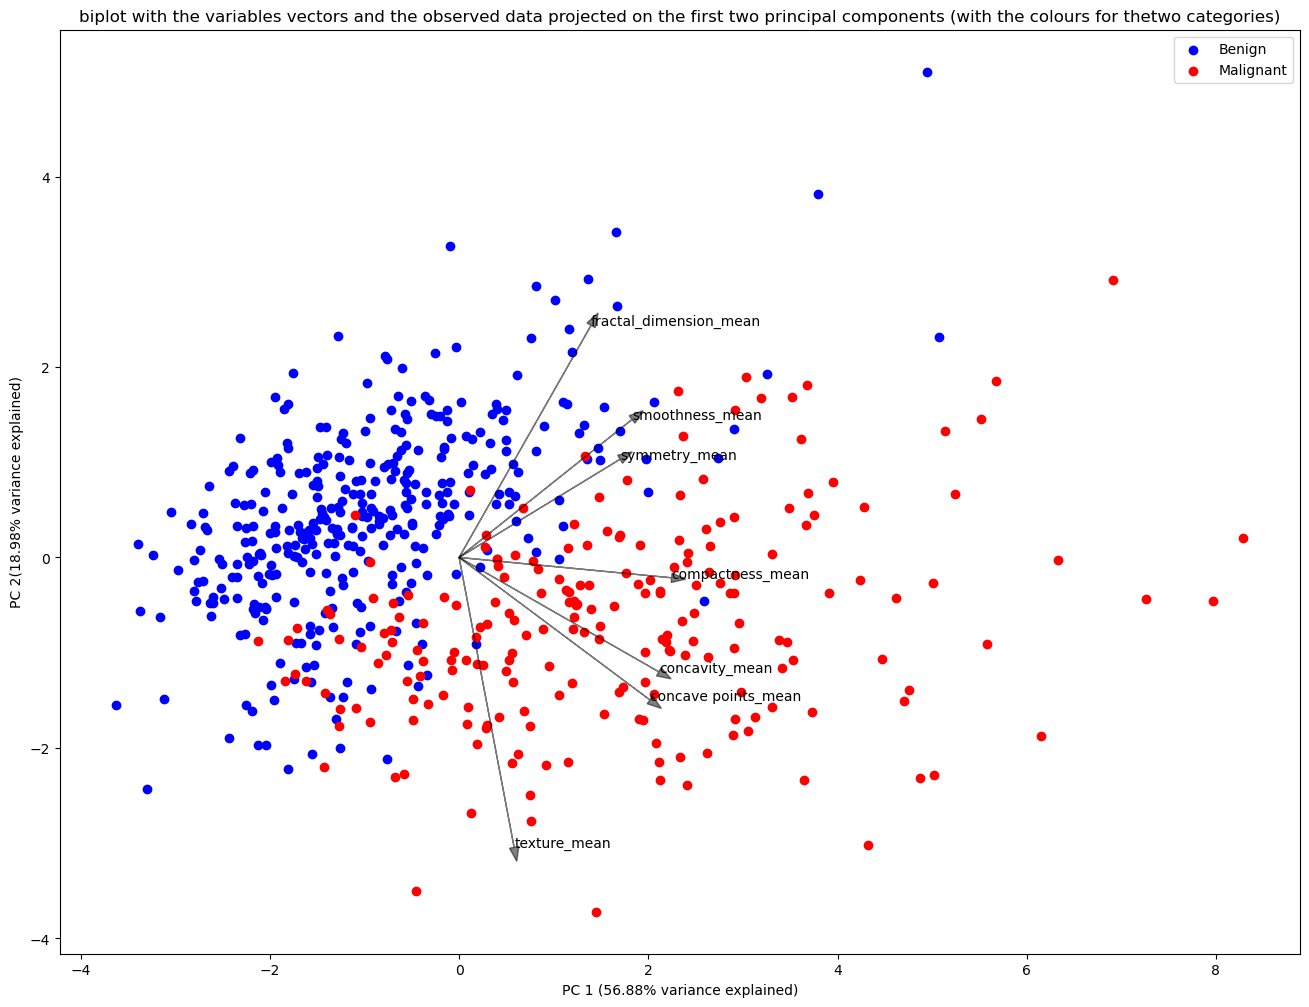

In [26]:
# Get the feature names
feature_names = X_bc.columns

# Create the biplot
plt.figure(figsize=(16, 12))

# Plot the data points
plt.scatter(X_pca[y_bc == 0, 0], X_pca[y_bc == 0, 1], c='blue', label='Benign')
plt.scatter(X_pca[y_bc == 1, 0], X_pca[y_bc == 1, 1], c='red', label='Malignant')

# Plot the variable vectors
for i, feature in enumerate(feature_names):
    plt.arrow(0, 0, 4.7*pca.components_[0, i], 4.7*pca.components_[1, i], color='black', alpha=0.5, head_width = 0.1)
    plt.text(pca.components_[0, i] * 4.7, pca.components_[1, i] * 4.7, feature, color='black')

# Set the axis labels
plt.xlabel('PC 1 ({}% variance explained)'.format(round((variance_ratio[0] * 100),2)))
plt.ylabel('PC 2({}% variance explained)'.format(round((variance_ratio[1] * 100),2)))
plt.title('biplot with the variables vectors and the observed data projected on the first two principal components (with the colours for thetwo categories)')

# Set the legend
plt.legend()

# Show the plot
plt.show()

In [27]:
# creating a data frame for each instances with their PC 1 and PC 2 values
PC_scores = pd.DataFrame(X_pca, columns = ['PC 1', 'PC 2'])

# creating a data frame for a loadings of 
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'])
                       
loadings['Features'] = X_bc.columns
loadings

PC1       PC2                Features
0  0.123742 -0.647590            texture_mean
1  0.388924  0.308252         smoothness_mean
2  0.477896 -0.045428        compactness_mean
3  0.449117 -0.255473          concavity_mean
4  0.429172 -0.318299     concave points_mean
5  0.362056  0.219412           symmetry_mean
6  0.296752  0.518480  fractal_dimension_mean

More closely related to tumour status in PC1 are the variables Compactness_Mean, Concavity_Mean, Concave Points_Mean, Symmetry_Mean, and Fractal_Size_Mean. This implies that these factors might significantly affect what factors determine whether tumours are present or what their characteristics are.

This suggests that changes to these characteristics may signal tumour initiation or progression.

Although there is an inverse correlation, the texture_mean variable in PC2 is associated with tumour status. This implies that the likelihood of a tumour or particular tumour characteristics is decreased when larger Texture_Mean values are present. This suggests that texture_mean may have a unique underlying mechanism or operate as a criterion for distinguishing particular tumour subtypes or traits.


##### Comparing the selected features with task 2:

The preceding table contains texture_mean, which has a load value of 0.123742 on PC1. This shows that the link between texture_average and the first principal component is not very strong.

The association between "tissue_mean" and tumour status is not revealed by PC1, however, as it is a composite of many variations.

Additionally accessible in the aforementioned table are concave_mean and concave point_mean, with loading values of 0.449117 and 0.429172 on PC1, respectively. These variations have considerably larger PC1 loadings, indicating a more robust relationship with the first major component. As was already mentioned, variables with greater loadings in PC1—such as B. "concave_mean" and "concave points_mean"—are more related to tumour status.

Concave point_mean, texture_mean, and concavity_mean are thus consistent choices for relevant features in the logistic regression model based on the data in the table above. The table provides evidence in favour of the claim that these factors are more strongly associated with tumour status, particularly when compared to the first principal component (PC1).

In [28]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_bc_scaled)

# Get the names of the components
component_names = ['PC{}'.format(i+1) for i in range(X_pca.shape[1])]

# Calculate cumulative explained variance ratios
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components to retain 95% of the explained variance
n_components = np.argmax(explained_variance_ratio_cumulative >= 0.95) + 1

print("Number of components to retain 95% of the explained variance:", n_components)
#print("Component names:", component_names)

Number of components to retain 95% of the explained variance: 5


The five primary components are able to account for 95% of the variation, which demonstrates that they effectively represent a significant portion of the data in the original dataset.

This shows that, despite the dimension reduction, the primary components are still accurately representational of the data.

Finding a balance between lowering the dimensionality of the data and greatly preserving its variability is made achievable by keeping 95% of the explained variance. With this method, we may streamline the dataset while still identifying the most important structures and trends.

It is crucial to remember that choosing to preserve 95% of the variation described is somewhat arbitrary and can change depending on the issue and dataset. A greater or lower threshold may be suitable in some circumstances.

Overall, retaining a considerable amount of information while keeping 95% of the variance described by the 5 primary components implies good dimensionality reduction, which could increase computational efficiency and interpretability in tasks requiring further analysis or modelling.

In [29]:
# Get the loadings of the principal components
component_loadings = pca.components_

# Create a dictionary to map component names to feature names
component_feature_mapping = {component_names[i]: X_bc.columns[np.abs(component_loadings[i]).argmax()] for i in range(n_components)}

# Print the component names and their corresponding feature names
for component_name, feature_name in component_feature_mapping.items():
    print(f"{component_name} top feature name: {feature_name}")


PC1 top feature name: compactness_mean
PC2 top feature name: texture_mean
PC3 top feature name: texture_mean
PC4 top feature name: symmetry_mean
PC5 top feature name: smoothness_mean


In [30]:
from sklearn.linear_model import LogisticRegression

# Project the data onto the new features
X_pca_selected = X_pca[:, :n_components]

# Train logistic regression on the new features
logistic_regression_pca = LogisticRegression()
logistic_regression_pca.fit(X_pca_selected, y_bc)

# Predict using the logistic regression model
X_pca_selected_test = X_test_bc[:, :n_components]
y_pred_pca = logistic_regression_pca.predict(X_pca_selected_test)

# Evaluate the performance
accuracy_pca = accuracy_score(y_test_bc, y_pred_pca)
precision_pca = precision_score(y_test_bc, y_pred_pca)
recall_pca = recall_score(y_test_bc, y_pred_pca)
f1_score_pca = f1_score(y_test_bc, y_pred_pca)

print("Logistic Regression Accuracy with PCA:", accuracy_pca)
print("Logistic Regression Precision with PCA:", precision_pca)
print("Logistic Regression Recall with PCA:", recall_pca)
print("Logistic Regression F1-Score with PCA:", f1_score_pca)


Logistic Regression Accuracy with PCA: 0.4649122807017544
Logistic Regression Precision with PCA: 0.275
Logistic Regression Recall with PCA: 0.2558139534883721
Logistic Regression F1-Score with PCA: 0.26506024096385544


In [31]:
print("Dimension of the new (projected) data set:", X_pca_selected.shape[1])

Dimension of the new (projected) data set: 5


The new (projected) dataset has a size of 5, which corresponds to the number of PCA components chosen. After using PCA, the new (projected) dataset has a size of 5.

It gained more features and shrunk in dimension to just have five major components.

There are many advantages to reducing the dataset's dimensionality. This may lessen the size curse, boost computing effectiveness, and perhaps even make data easier to understand. A considerable quantity of data can be extracted from the original dataset while lowering its dimensionality by keeping 95% of the explained variance.

The selected features for the logistic regression model based on the threshold feature importance of 0.95 are:

- concave points_mean
- concavity_mean
- compactness_mean
- smoothness_mean
- symmetry_mean

For the top 5 Principal Components Analysis (PCA) components, the corresponding top feature names are:

- PC1 top feature name: compactness_mean
- PC2 top feature name: texture_mean
- PC3 top feature name: texture_mean
- PC4 top feature name: symmetry_mean
- PC5 top feature name: smoothness_mean

It appears that there is some inconsistency between the traits chosen for the logistic regression and the crucial traits discovered by the PCA. Even though some features overlap, PCA components can identify extra information or patterns in the data that are not well-represented by individual features. The original features are combined into linear combinations to create PCA components, which are then chosen for their propensity to explain the most variance in the data.

It is crucial to remember that the decision to use the PCA components or the chosen features depends on the analysis's goal and the problem that has to be solved. The chosen functions can be used directly, which improves interpretability and allows for greater domain knowledge adaptation. However, PCA can be helpful for lowering size and identifying hidden factors that would not have been apparent in the original scope.

Comparing the performance of logistic regression with and without PCA, observe the following:

Comparing the results of Logistic Regression before and after applying Principal Component Analysis (PCA), observe the following:

Before PCA:
- Logistic Regression Accuracy: 0.956140350877193
- Logistic Regression Precision: 0.9318181818181818
- Logistic Regression Recall: 0.9534883720930233
- Logistic Regression F1-Score: 0.942528735632184

After PCA:
- Logistic Regression Accuracy with PCA: 0.4649122807017544
- Logistic Regression Precision with PCA: 0.275
- Logistic Regression Recall with PCA: 0.2558139534883721
- Logistic Regression F1-Score with PCA: 0.26506024096385544

After employing PCA, the data reveal a considerable decline in performance.

All four metrics—accuracy, precision, recall, and F1 score—show a decline. This implies that PCA might not be suitable in this specific situation given the available data or the chosen number of retained main components.

The results show that using PCA prior to logistic regression has a negative impact on the model's performance. In this instance:

1. Determine If Downsizing Is Necessary: Ascertain whether a certain problem calls for downsizing. One may think about doing away with PCA entirely if the initial feature set was not overly comprehensive or the features were useful and pertinent.

2. Count the number of important parts that PCA keeps in good working order.It's worthwhile to experiment with various component counts to discover the ideal compromise between data retention and size reduction. To test whether results improve, try raising the component count or forgoing PCA altogether.

3. Review data and feature engineering: Ensure that the data has been thoroughly examined and preprocessed before performing PCA. Taking care of missing values, encoding categorical variables, and scaling numerical features are all included in this. Without requiring dimensionality reduction, proper engineering and feature selection methods can yield better outcomes.

4. Experiment with other models: The best model for the data may not be logistic regression. To determine if they perform better without having to downsize, it is worthwhile to explore different categorisation algorithms like random forests, support vector machines (SVMs), or neural networks.

Remember that the dataset's unique properties and the nature of this challenge will determine the appropriate method. It is crucial to try out many strategies for this specific work, assess them, and select the one that offers the best performance and generalizability.

### Conclusion

According to a comparison of the logistic regression before and after using PCA, it appears that in this specific situation, utilising PCA has a considerable negative impact on model performance. After PCA, accuracy, precision, recall, and F1 score all considerably declined.

It is therefore clear that using PCA before logistic regression is not advantageous for this particular dataset and issue. Lower prediction performance was the result of the vital information or noise being lost through the shrinking process supplied by PCA.

It is significant to note that depending on the data collection and the particular issue, PCA's efficacy and effect on model performance may differ. Despite being a well-liked size reduction method, PCA is not always more effective.

In conclusion, based on the findings, it is advised to take other measures into account in order to enhance the performance of the logistic regression model, such as B. forgoing PCA, trying out other models, and thoroughly assessing the data pretreatment and feature engineering phases.

# A clustering analysis on airlines safety records

In [32]:
file_path = os.path.join(os.getcwd(), 'airline-safety.csv')  
df_airline_safety = pd.read_csv(file_path)
df_airline_safety.columns

Index(['airline', 'avail_seat_km_per_week', 'incidents_85_99',
       'fatal_accidents_85_99', 'fatalities_85_99', 'incidents_00_14',
       'fatal_accidents_00_14', 'fatalities_00_14'],
      dtype='object')

### About the dataset

The dataset "airline-safety.csv" contains information about the safety records of various airlines. It provides a comprehensive overview of airline safety measures and incidents over a specific period. Here is a description of the columns in the dataset:

1. `airline`: The name of the airline.
2. `avail_seat_km_per_week`: The number of available seat kilometers flown by the airline per week.
3. `incidents_85_99`: The number of incidents recorded by the airline from 1985 to 1999.
4. `fatal_accidents_85_99`: The number of fatal accidents recorded by the airline from 1985 to 1999.
5. `fatalities_85_99`: The number of fatalities resulting from accidents recorded by the airline from 1985 to 1999.
6. `incidents_00_14`: The number of incidents recorded by the airline from 2000 to 2014.
7. `fatal_accidents_00_14`: The number of fatal accidents recorded by the airline from 2000 to 2014.
8. `fatalities_00_14`: The number of fatalities resulting from accidents recorded by the airline from 2000 to 2014.

Each row in the dataset represents a different airline, and the columns provide information about safety-related incidents and accidents for each airline during specific time periods.

This dataset can be used to analyze and compare the safety records of different airlines, identify trends in airline safety over time, and explore the relationship between the number of incidents, fatal accidents, and fatalities.

### Aim

The goal of the research is to evaluate the provided airline safety record and find patterns among airlines' past safety records.

For the time spans 1985–1999 and 2000–2014, this research contains airline classifications based on incident, fatal accident, and fatality characteristics.

Compare the safety records of different airlines and look for any patterns or trends. This data can be helpful for evaluating the overall safety performance of airlines, pinpointing potential problem areas, and contrasting safety records over time periods.

We can evaluate how airlines are classified based on their previous safety performance according to cluster analysis, which sheds light on airlines with comparable safety records.

This analysis can also aid in our understanding of how security-related incidents affect passengers' perceptions and preferences when picking an airline.

By comparing similar airlines based on their historical safety records and, at your option, offering insight into how the general public reacted to high-profile occurrences, you can develop a data-driven understanding of airline safety.

### Methodology:

The processes that are commonly taken while doing a flight safety case cluster analysis are as follows:

1. Cleansing and addressing missing values, outliers, and data inconsistencies in the dataset.Data preparation for cluster analysis involves choosing pertinent variables and attributes.

2. Choose the proper variables and functions to gather data for the flight safety record. Take into account variables like events, fatalities, and other security-related indicators.

3. Data scaling may be necessary to guarantee that all variables contribute evenly to the clustering process, depending on the kind and size of the variables. Normalisation (z-score normalisation) and min-max scaling are popular scaling methods.

4. Ascertain the ideal quantity of clusters (K): Determine the ideal number of clusters by using methods like the elbow approach or silhouette analysis. These techniques assess cluster compactness and segregation to determine the threshold beyond which the performance of clustering is not significantly enhanced by the addition of more clusters.

5. Use K-Means clustering: Divide data into K clusters using the K-Means algorithm. The algorithm is run using random centres at the beginning, and cluster assignments and centres are updated repeatedly until convergence. Analyse the degree of similarity between data points using the Euclidean distance metric.

6. assess clusters: Examine the generated clusters and assess their characteristics in light of the clustering variables. To discover trends and distinctions among clusters, look at cluster centres or representative data points. In order to evaluate data meaningfully, take into account each group's safety records, incident rates, accident rates, and fatalities.

7. Evaluate and validate: Use relevant evaluation measures, such as silhouette score, sum of squares of clusters, or other domain-specific metrics, to assess the quality of the clustering solution. Validate the findings by contrasting them with domain knowledge or by conducting more research to verify models and cluster data.

8. Report Results: Outline the analytic findings each cluster, highlighting the traits, security histories, and noteworthy findings or suggestions for each cluster. Use illustrations or diagrams to help people visualise assemblies to improve comprehension and communication.

In [33]:
# Check for null or NaN values in the DataFrame
missing_values = df_airline_safety.isnull().sum()
print(missing_values)


airline                   0
avail_seat_km_per_week    0
incidents_85_99           0
fatal_accidents_85_99     0
fatalities_85_99          0
incidents_00_14           0
fatal_accidents_00_14     0
fatalities_00_14          0
dtype: int64


There is no missing values. So no data is dropped or replaced.

##### Visualization of the dataset

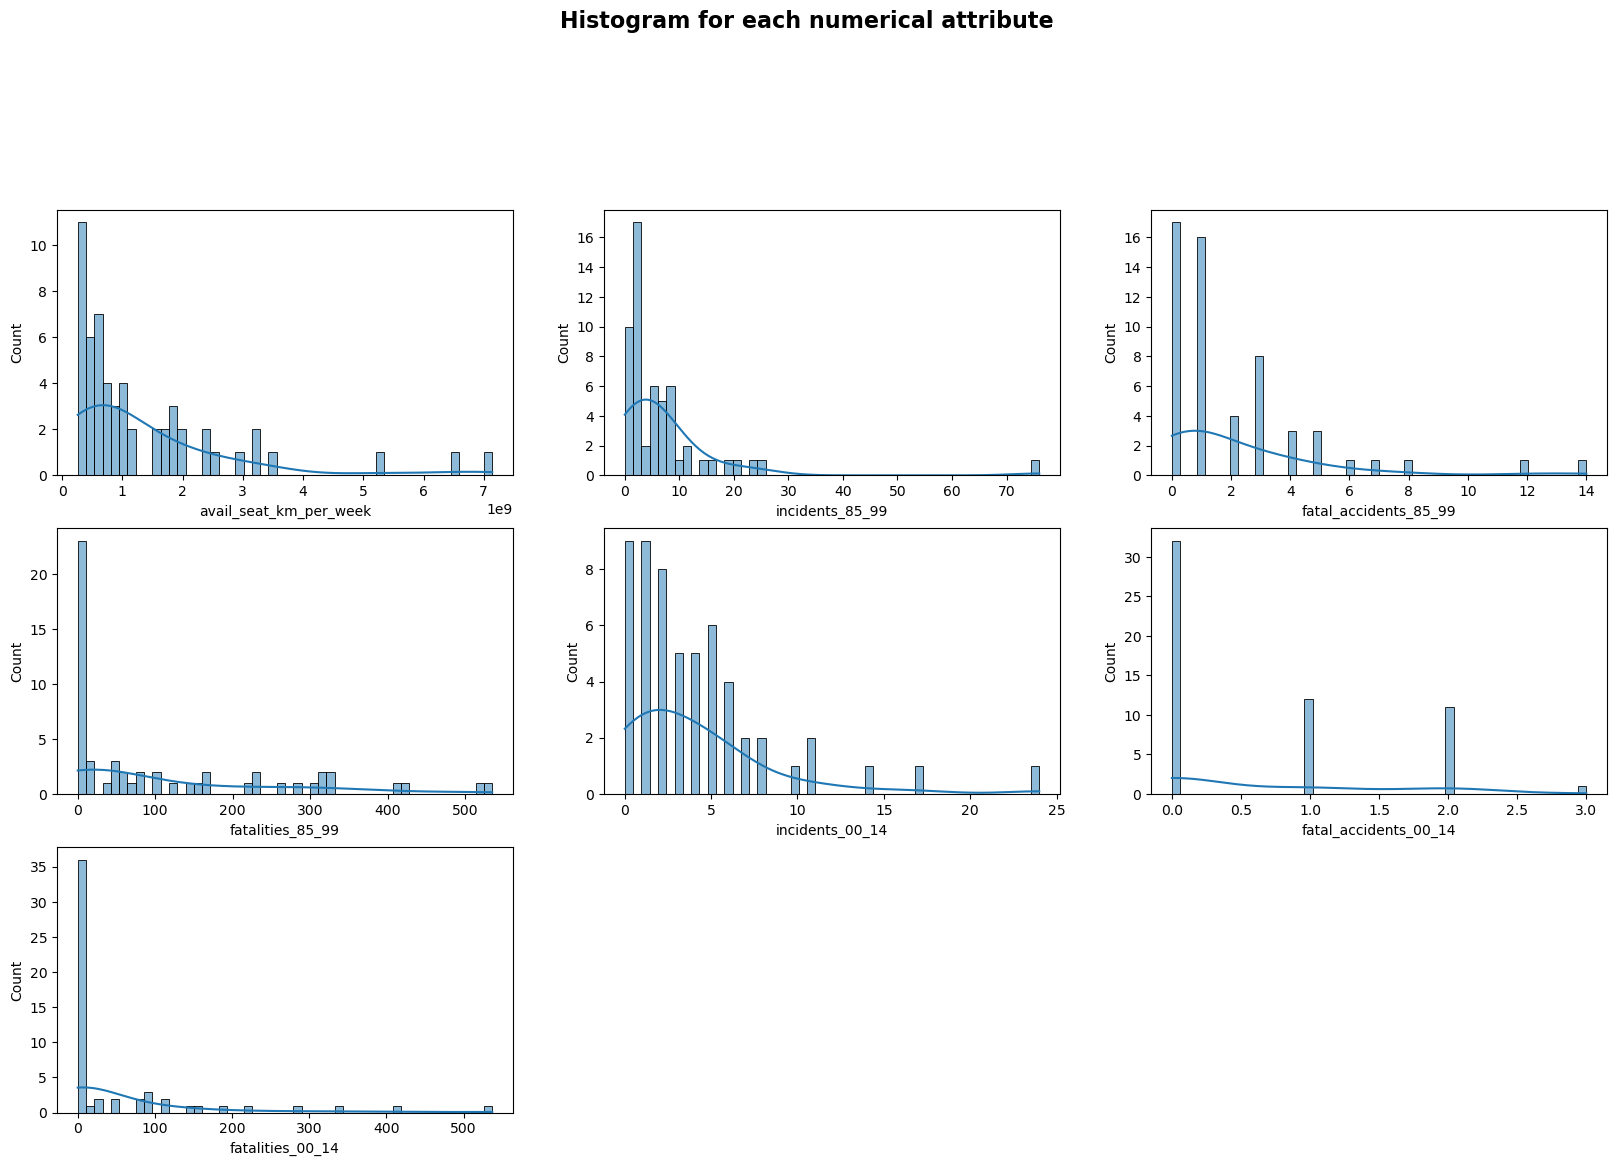

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a figure with subplots for each numerical feature
fig, axs = plt.subplots(ncols=3, nrows=5, figsize=(20, 20))

# set the title for the figure
fig.suptitle('Histogram for each numerical attribute', fontweight='bold', fontsize=16)

# iterate through the columns and plot the histogram using seaborn
for i, column in enumerate(df_airline_safety.select_dtypes(include=['float64', 'int64']).columns):
    sns.histplot(data=df_airline_safety, x=column, kde=True, ax=axs[i//3, i%3], bins=50)

# remove the empty subplots
for i in range(df_airline_safety.select_dtypes(include=['float64', 'int64']).shape[1], 15):
    fig.delaxes(axs[i//3, i%3])

# display the plot
plt.show()

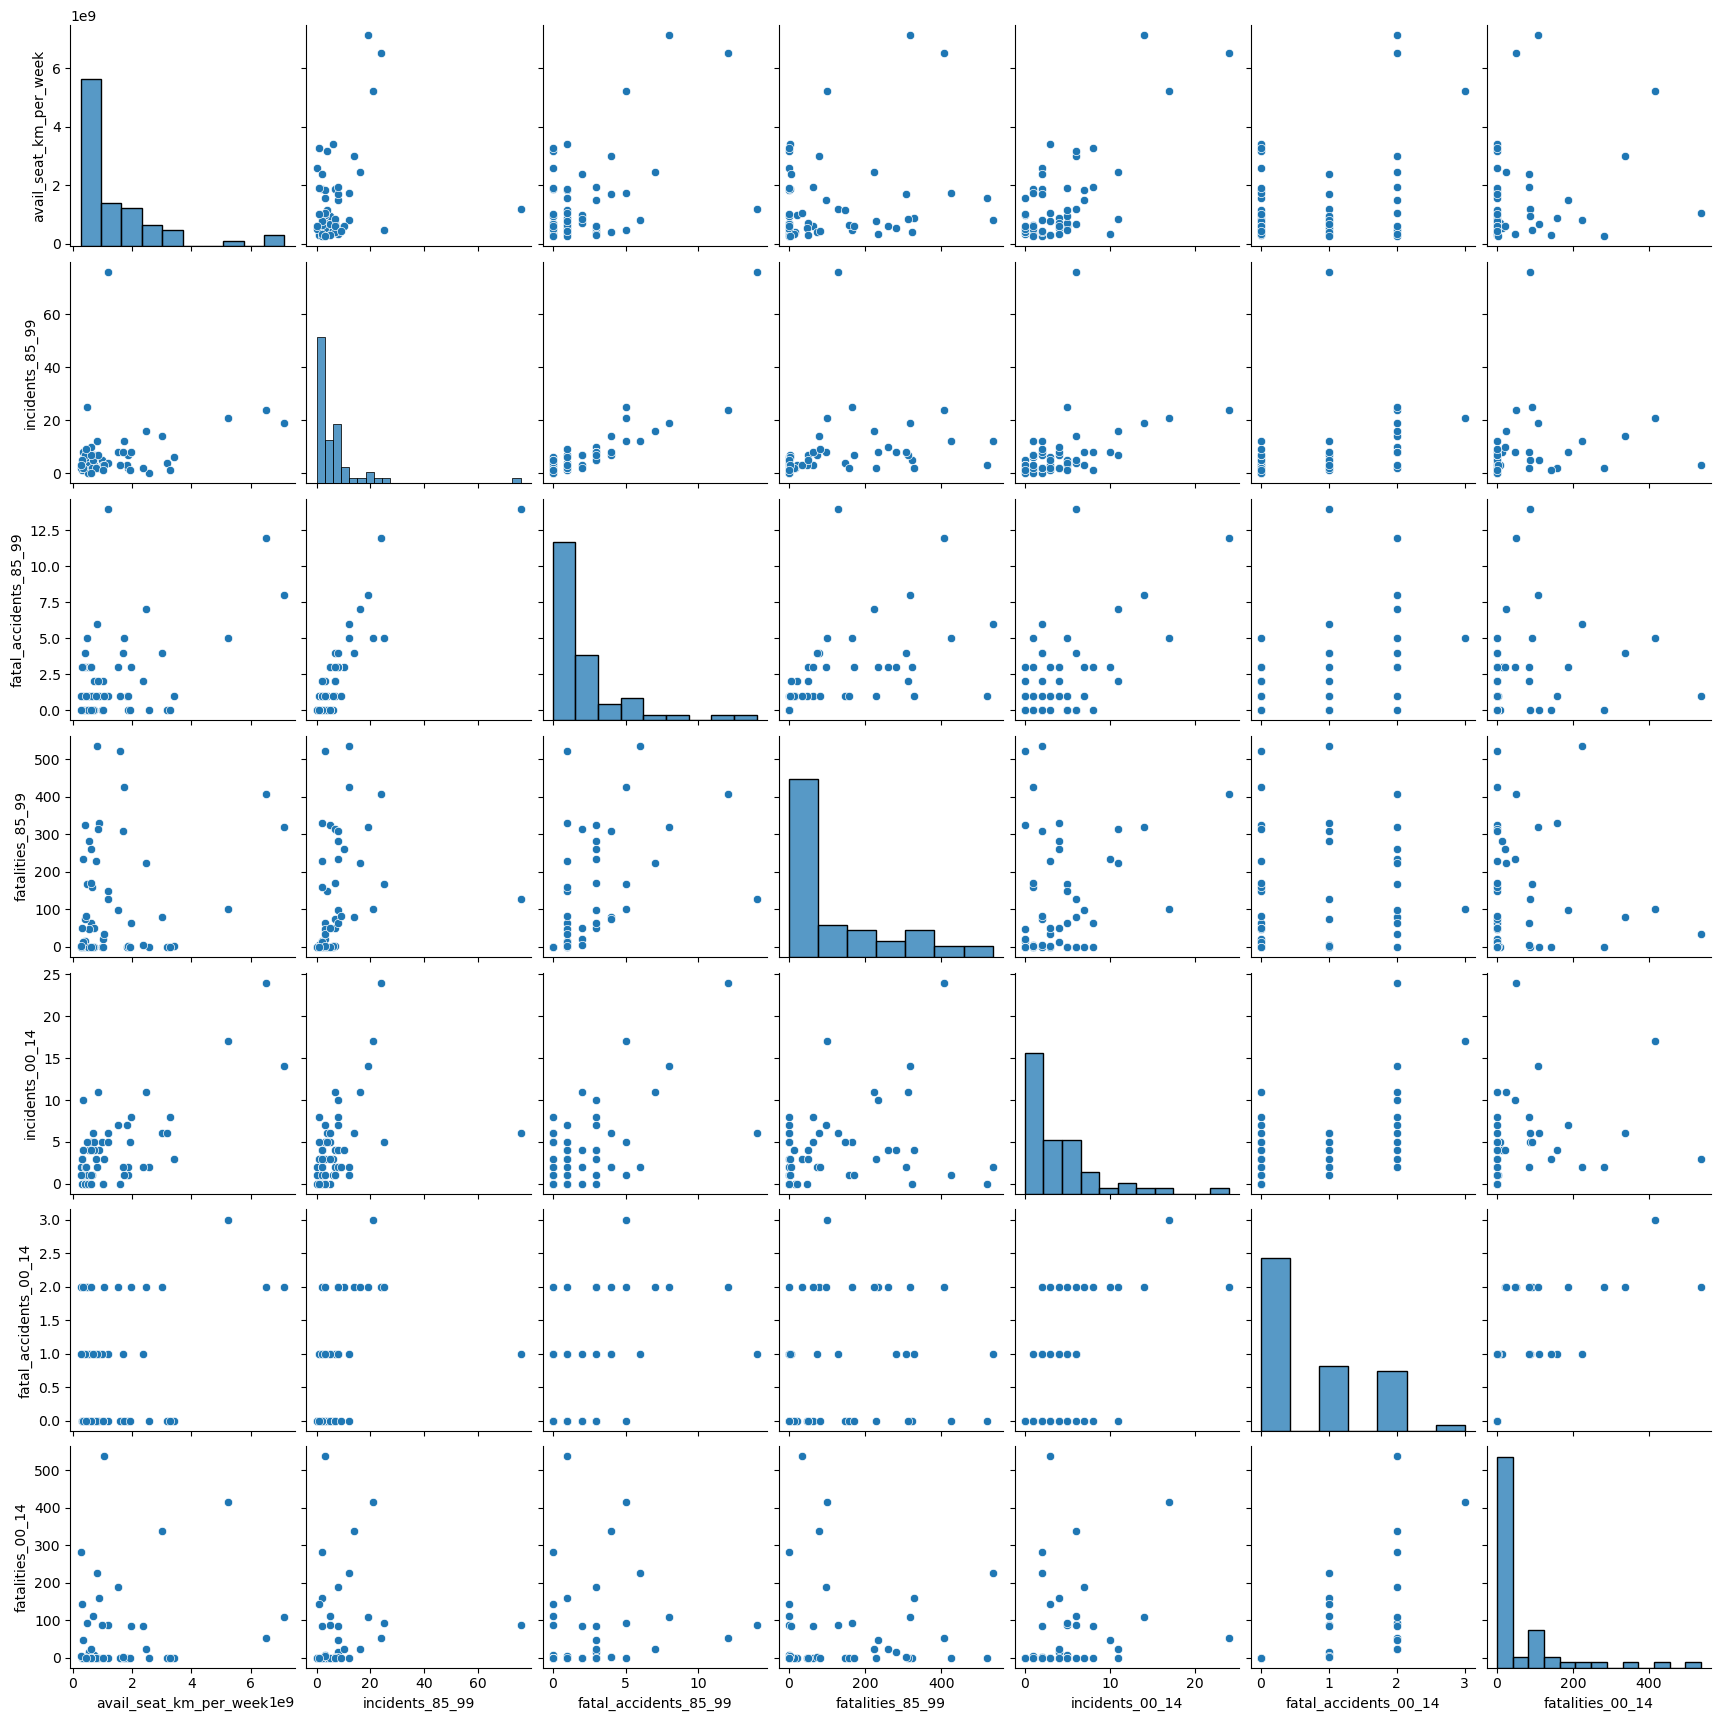

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the features to include in the pair plot
selected_features = ['airline', 'avail_seat_km_per_week', 'incidents_85_99', 'fatal_accidents_85_99',
                     'fatalities_85_99', 'incidents_00_14', 'fatal_accidents_00_14', 'fatalities_00_14']

# Create a pair plot
sns.pairplot(df_airline_safety[selected_features])
plt.show()

As the data distribution in the Aviation Security DataFrame is left-skewed, it signifies that there is a long tail on the left side and that the data is concentrated on the right side of the distribution. This could mean that there have been comparatively few mishaps, fatalities, and fatalities in terms of flying safety.

According to a left-skewed distribution of flight safety data, there are often fewer incidents and accidents compared to the total weekly usable seat-kilometers.

When features in the dataset have multiple sizes or units, normalising the data by subtracting the mean and dividing by the standard deviation can be helpful. The analysis may not be dominated by some aspects since they have larger values if all features are scaled to a same level.

Due to the small number of rows of data in the Flight Safety dataset, selecting all data attributes may result in restrictions and problems like overfitting or sparse display of some variables.

It becomes challenging to gather trustworthy and useful information when working with a small set of data rows since the sample size could not be sufficiently representative of the population.

In some situations, adding all data attributes can make the problems worse. When there are few data points, the likelihood of overfitting grows as more characteristics are considered because the model may attempt to capture noise in the data rather than actual patterns. Additionally, some features may not contribute much if they have a high percentage of zeros or missing values.

It is advised to exercise caution and take feature selection strategies into consideration while working with limited data sets to find the most pertinent and instructive features. By concentrating on variables that have a higher effect on the target variable or are acknowledged to be relevant in the field, these strategies can help reduce the dataset's dimensionality. Reduce the possibility of overfitting and increase the analysis's interpretability and generalizability by choosing a smaller group of features.

In [36]:
df_airline_safety.columns

Index(['airline', 'avail_seat_km_per_week', 'incidents_85_99',
       'fatal_accidents_85_99', 'fatalities_85_99', 'incidents_00_14',
       'fatal_accidents_00_14', 'fatalities_00_14'],
      dtype='object')

In [37]:
# Select the features to use for clustering
df_as=df_airline_safety.drop('airline',axis=1)
df_as.columns

Index(['avail_seat_km_per_week', 'incidents_85_99', 'fatal_accidents_85_99',
       'fatalities_85_99', 'incidents_00_14', 'fatal_accidents_00_14',
       'fatalities_00_14'],
      dtype='object')

##### K-means with Silhouette score

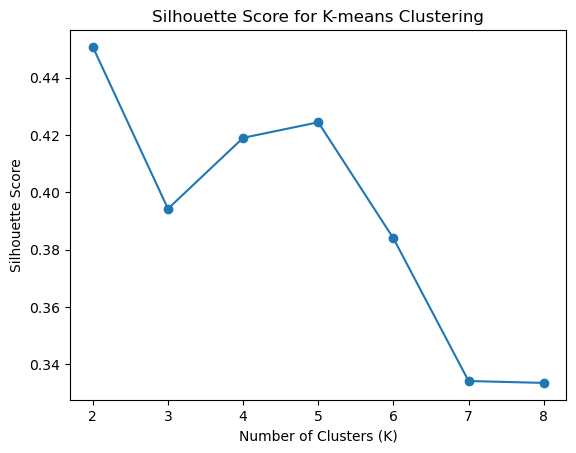

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import MinMaxScaler


# Scale the data using min-max scaler
scaler = MinMaxScaler()
X_as_scaled = scaler.fit_transform(df_as)

# Set the random state for reproducibility
random_state = 5508

# Initialize empty lists to store the values of K and silhouette scores
k_values = []
silhouette_scores = []

# Perform K-means clustering for different values of K
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    labels = kmeans.fit_predict(X_as_scaled)
    silhouette_avg = silhouette_score(X_as_scaled, labels)
    k_values.append(k)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-means Clustering')
plt.show()

In [39]:
silhouette_scores

[0.45075634587418023,
 0.3942930858792117,
 0.41904506383728973,
 0.4244639820763271,
 0.3839680177162132,
 0.33421092762578447,
 0.33354499782399494]

In [40]:
best_k_index = np.argmax(silhouette_scores)
best_k = best_k_index + 2  # Adding 2 to get the actual k value

print("The best k value is:", best_k)

The best k value is: 2


The silhouette score measures the compactness and separation of clusters in a clustering algorithm. It ranges from -1 to 1, where a higher score indicates better-defined and well-separated clusters.

Based on the silhouette scores provided, observe that the highest silhouette score is achieved when k=2 with a score of 0.45075634587418023. As the number of clusters increases beyond k=2, the silhouette scores gradually decrease, indicating poorer cluster separation and compactness.

Therefore, based on the silhouette scores, it seems that k=2 may be the most appropriate choice for clustering in this case. 

##### Plot Silhouette Coefficient on different K values (2 to 8)

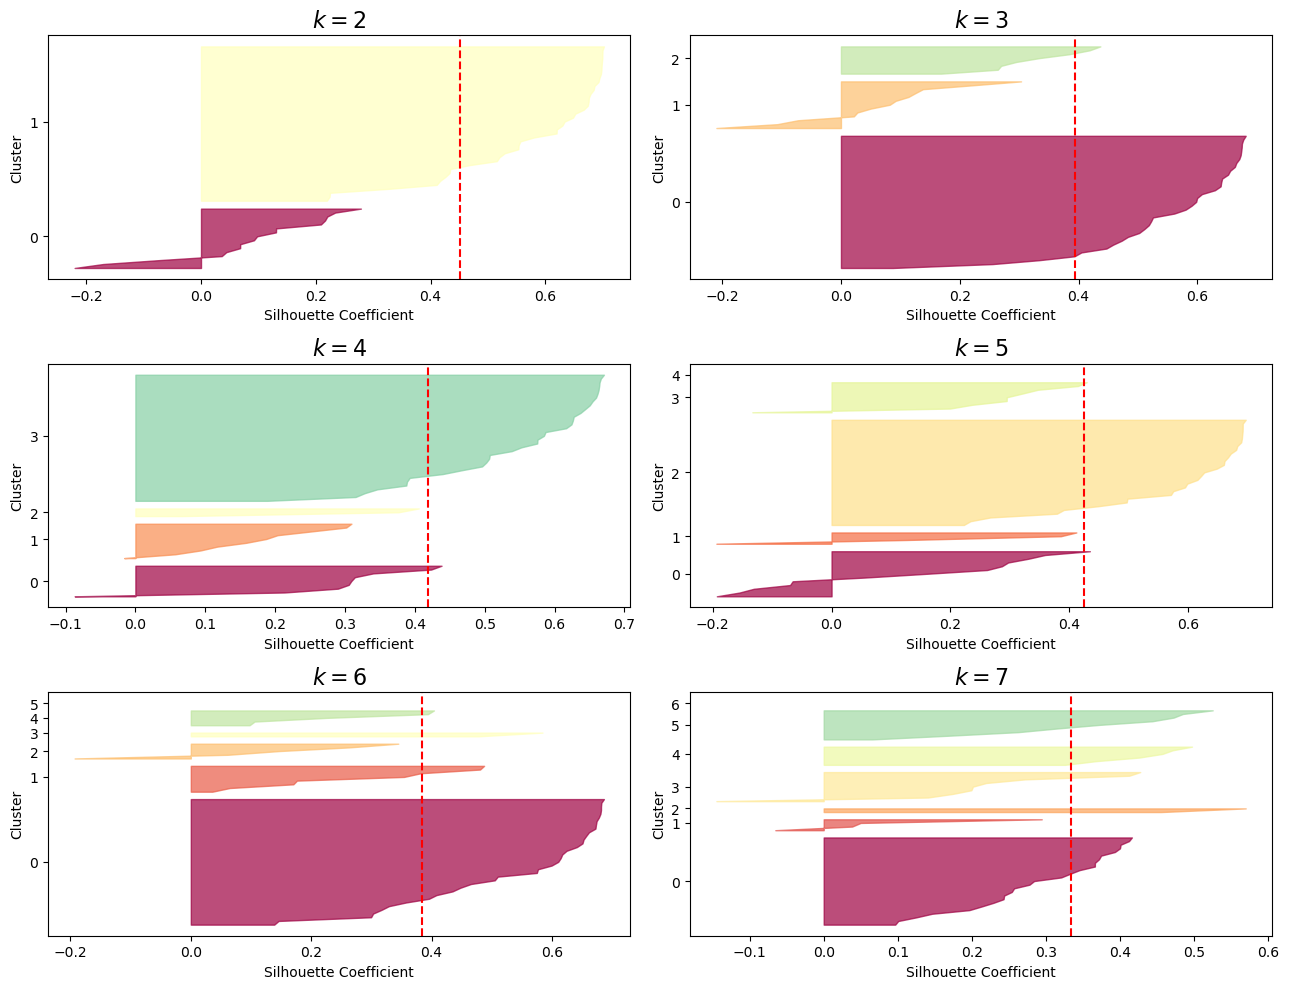

In [41]:
from matplotlib.ticker import FixedLocator, FixedFormatter
from sklearn.cluster import KMeans

k_values = range(2, 8)
kmeans_per_k = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_as_scaled)  # Assuming X_as_scaled is the preprocessed data

    kmeans_per_k.append(kmeans)

plt.figure(figsize=(13, 10))
for idx, k in enumerate(range(2, 8)):
    plt.subplot(3, 2, idx + 1)  # Adjust the subplot layout for six plots

    y_pred = kmeans_per_k[k-2].labels_
    silhouette_coefficients = silhouette_samples(X_as_scaled, y_pred)

    padding = len(X_as_scaled) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    plt.xlabel("Silhouette Coefficient")
    plt.ylabel("Cluster")
    plt.title("$k={}$".format(k), fontsize=16)
    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")

plt.tight_layout()
plt.show()


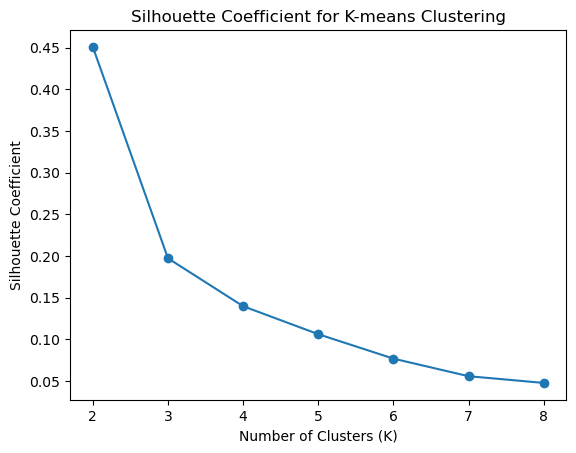

In [42]:
# Calculate silhouette coefficients
k_values = range(2, 9)
silhouette_coefficients = np.array(silhouette_scores) / (np.array(k_values) - 1)

# Plot the silhouette coefficients
plt.plot(k_values, silhouette_coefficients, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient for K-means Clustering')
plt.show()

In [43]:
silhouette_coefficients

array([0.45075635, 0.19714654, 0.13968169, 0.106116  , 0.0767936 ,
       0.05570182, 0.04764929])

The cohesion and divergence of each sample with respect to samples from other clusters are both taken into account when calculating the Silhouette coefficient, which assesses the cluster quality.

A greater value of the coefficient, which runs from -1 to 1, indicates clusters that are more clearly defined and focused.

Keep in mind that the greatest coefficient, 0.45075635, is attained when k=2 according to the supplied silhouette coefficients. The silhouette coefficients gradually drop above k=2 as the number of clusters rises.

This demonstrates that the quality of the clustering degrades as the number of clusters rises.

In this instance, k=2 does yield the largest silhouette coefficient, suggesting that a binary clustering approach would be the best option.

##### Finding the clusters characteristics

In [44]:
# Set the random state for reproducibility
random_state = 5508

# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=random_state)
labels = kmeans.fit_predict(X_as_scaled)

# Assign labels to the original dataset
df_airline_safety['cluster_task2'] = labels

# Calculate the mean values for each feature within each cluster
cluster_means = df_airline_safety.groupby('cluster_task2').mean()

# Print the interpretation of each group
for i in range(2):
    print("Cluster", i+1, "Characteristics:")
    print("Safety Record - Incidents 1985-1999:", cluster_means.loc[i, 'incidents_85_99'])
    print("Safety Record - Fatal Accidents 1985-1999:", cluster_means.loc[i, 'fatal_accidents_85_99'])
    print("Safety Record - Fatalities 1985-1999:", cluster_means.loc[i, 'fatalities_85_99'])
    print("Safety Record - Incidents 2000-2014:", cluster_means.loc[i, 'incidents_00_14'])
    print("Safety Record - Fatal Accidents 2000-2014:", cluster_means.loc[i, 'fatal_accidents_00_14'])
    print("Safety Record - Fatalities 2000-2014:", cluster_means.loc[i, 'fatalities_00_14'])
    print()

Cluster 1 Characteristics:
Safety Record - Incidents 1985-1999: 17.571428571428573
Safety Record - Fatal Accidents 1985-1999: 5.285714285714286
Safety Record - Fatalities 1985-1999: 189.28571428571428
Safety Record - Incidents 2000-2014: 8.5
Safety Record - Fatal Accidents 2000-2014: 1.9285714285714286
Safety Record - Fatalities 2000-2014: 178.64285714285714

Cluster 2 Characteristics:
Safety Record - Incidents 1985-1999: 3.7142857142857144
Safety Record - Fatal Accidents 1985-1999: 1.1428571428571428
Safety Record - Fatalities 1985-1999: 86.78571428571429
Safety Record - Incidents 2000-2014: 2.6666666666666665
Safety Record - Fatal Accidents 2000-2014: 0.23809523809523808
Safety Record - Fatalities 2000-2014: 14.476190476190476



Compared to group 2, group 1 has superior ratings on all safety record metrics. This suggests that throughout the time periods 1985–1999 and 2000–2014, group 1 represents units or groups with relatively higher rates of safety issues, accidents fatalities, and deaths.

Higher values suggest a possibly weakened security history.

Compared to Group 1, Group 2 typically scores lower on all safety record metrics, which denotes a reduced frequency of safety events, deaths, and fatalities. These lower ratings reflect a higher level of safety for Group 2 organisations or groups.

Different security practises, measures, or context for the entities or groups represented by each cluster may be indicated by differences in security records between two clusters.

In [45]:
df_airline_safety.columns

Index(['airline', 'avail_seat_km_per_week', 'incidents_85_99',
       'fatal_accidents_85_99', 'fatalities_85_99', 'incidents_00_14',
       'fatal_accidents_00_14', 'fatalities_00_14', 'cluster_task2'],
      dtype='object')

##### Clustering with time periods from 2000-2014 to 1985-1999

In [46]:
# Separate the variables from the years 1985-1999
data_1985_1999 = df_airline_safety[['incidents_85_99', 'fatal_accidents_85_99', 'fatalities_85_99']]

# Separate the variables from the years 2000-2014
data_2000_2014 = df_airline_safety[['incidents_00_14', 'fatal_accidents_00_14', 'fatalities_00_14']]

# Perform K-means clustering on the variables from 1985-1999
kmeans_1985_1999 = KMeans(n_clusters=2, random_state=5508)
clusters_1985_1999 = kmeans_1985_1999.fit_predict(data_1985_1999)

# Perform K-means clustering on the variables from 2000-2014
kmeans_2000_2014 = KMeans(n_clusters=2, random_state=5508)
clusters_2000_2014 = kmeans_2000_2014.fit_predict(data_2000_2014)

# Print the resulting clusters for both datasets
print("Clusters for variables from 1985-1999:", clusters_1985_1999)
print("Clusters for variables from 2000-2014:", clusters_2000_2014)

Clusters for variables from 1985-1999: [1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1
 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1]
Clusters for variables from 2000-2014: [0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


There doesn't seem to have been any change in the clusters between the two time periods based on these cluster allocations.

Both sets of variables are primarily assigned to group 1 in both periods, with the exception of a few variables that are assigned to group 0 in the second period.

This shows that most of the variables have fallen into the same category and that the pattern or grouping of the variables has stayed largely consistent over time. However, the few variables allocated to group 0 in the second period may indicate very little variations.

In [47]:
# Add cluster labels for variables from 1985-1999 to the main dataframe
df_airline_safety['clusters_1985_1999'] = clusters_1985_1999

# Add cluster labels for variables from 2000-2014 to the main dataframe
df_airline_safety['clusters_2000_2014'] = clusters_2000_2014

# Print the updated dataframe
#print(df_airline_safety)

#df_airline_safety.columns

In [48]:
# Calculate cluster characteristics for variables from 1985-1999
cluster_1_indices_1985_1999 = np.where(clusters_1985_1999 == 0)[0]
cluster_2_indices_1985_1999 = np.where(clusters_1985_1999 == 1)[0]

cluster_1_characteristics_1985_1999 = data_1985_1999.iloc[cluster_1_indices_1985_1999].mean()
cluster_2_characteristics_1985_1999 = data_1985_1999.iloc[cluster_2_indices_1985_1999].mean()

# Calculate cluster characteristics for variables from 2000-2014
cluster_1_indices_2000_2014 = np.where(clusters_2000_2014 == 0)[0]
cluster_2_indices_2000_2014 = np.where(clusters_2000_2014 == 1)[0]

cluster_1_characteristics_2000_2014 = data_2000_2014.iloc[cluster_1_indices_2000_2014].mean()
cluster_2_characteristics_2000_2014 = data_2000_2014.iloc[cluster_2_indices_2000_2014].mean()

# Print cluster characteristics for variables from 1985-1999
print("Cluster 1 Characteristics (1985-1999):")
print(cluster_1_characteristics_1985_1999)

print("\nCluster 2 Characteristics (1985-1999):")
print(cluster_2_characteristics_1985_1999)

# Print cluster characteristics for variables from 2000-2014
print("\nCluster 1 Characteristics (2000-2014):")
print(cluster_1_characteristics_2000_2014)

print("\nCluster 2 Characteristics (2000-2014):")
print(cluster_2_characteristics_2000_2014)


Cluster 1 Characteristics (1985-1999):
incidents_85_99            9.714286
fatal_accidents_85_99      4.214286
fatalities_85_99         336.285714
dtype: float64

Cluster 2 Characteristics (1985-1999):
incidents_85_99           6.333333
fatal_accidents_85_99     1.500000
fatalities_85_99         37.785714
dtype: float64

Cluster 1 Characteristics (2000-2014):
incidents_00_14           3.88
fatal_accidents_00_14     0.50
fatalities_00_14         22.46
dtype: float64

Cluster 2 Characteristics (2000-2014):
incidents_00_14            6.166667
fatal_accidents_00_14      2.000000
fatalities_00_14         331.000000
dtype: float64


In [49]:
# Identify categorical columns
categorical_columns = df_airline_safety.select_dtypes(include=['object']).columns.tolist()

##### Clustering with the ratio of variables from 2000-2014 to 1985-1999

In [50]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer


# Select relevant columns for clustering
columns_85_99 = ['incidents_85_99', 'fatal_accidents_85_99', 'fatalities_85_99']
columns_00_14 = ['incidents_00_14', 'fatal_accidents_00_14', 'fatalities_00_14']

# Convert non-numeric columns to numeric format
label_encoder = LabelEncoder()
df_airline_safety['airline'] = label_encoder.fit_transform(df_airline_safety['airline'])

# Handle missing values by mean imputation
imputer = SimpleImputer(strategy='mean')
df_airline_safety[columns_85_99] = imputer.fit_transform(df_airline_safety[columns_85_99])
df_airline_safety[columns_00_14] = imputer.fit_transform(df_airline_safety[columns_00_14])


# Create new features as the ratio of variables from 2000-2014 to 1985-1999
df_airline_safety['incidents_ratio'] = np.where(df_airline_safety['incidents_85_99'] != 0, df_airline_safety['incidents_00_14'] / df_airline_safety['incidents_85_99'], 0)
df_airline_safety['fatal_accidents_ratio'] = np.where(df_airline_safety['fatal_accidents_85_99'] != 0, df_airline_safety['fatal_accidents_00_14'] / df_airline_safety['fatal_accidents_85_99'], 0)
df_airline_safety['fatalities_ratio'] = np.where(df_airline_safety['fatalities_85_99'] != 0, df_airline_safety['fatalities_00_14'] / df_airline_safety['fatalities_85_99'], 0)


# Scale the data
scaler = StandardScaler()
scaled_df_as = scaler.fit_transform(df_airline_safety[['incidents_ratio', 'fatal_accidents_ratio', 'fatalities_ratio']])

# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=5508)
clusters = kmeans.fit_predict(scaled_df_as)

# Add the cluster labels to the dataframe
df_airline_safety['cluster_task5'] = clusters

# Print the cluster characteristics
for cluster_num in range(2):
    cluster_df = df_airline_safety[df_airline_safety['cluster_task5'] == cluster_num]
    print(f"Cluster {cluster_num + 1} Characteristics:")
    print("Safety Record - Incidents 1985-1999:", cluster_df['incidents_85_99'].mean())
    print("Safety Record - Fatal Accidents 1985-1999:", cluster_df['fatal_accidents_85_99'].mean())
    print("Safety Record - Fatalities 1985-1999:", cluster_df['fatalities_85_99'].mean())
    print("Safety Record - Incidents 2000-2014:", cluster_df['incidents_00_14'].mean())
    print("Safety Record - Fatal Accidents 2000-2014:", cluster_df['fatal_accidents_00_14'].mean())
    print("Safety Record - Fatalities 2000-2014:", cluster_df['fatalities_00_14'].mean())
    print()


Cluster 1 Characteristics:
Safety Record - Incidents 1985-1999: 2.5
Safety Record - Fatal Accidents 1985-1999: 1.5
Safety Record - Fatalities 1985-1999: 20.0
Safety Record - Incidents 2000-2014: 2.5
Safety Record - Fatal Accidents 2000-2014: 1.5
Safety Record - Fatalities 2000-2014: 310.0

Cluster 2 Characteristics:
Safety Record - Incidents 1985-1999: 7.351851851851852
Safety Record - Fatal Accidents 1985-1999: 2.2037037037037037
Safety Record - Fatalities 1985-1999: 115.83333333333333
Safety Record - Incidents 2000-2014: 4.185185185185185
Safety Record - Fatal Accidents 2000-2014: 0.6296296296296297
Safety Record - Fatalities 2000-2014: 46.092592592592595



These clusters' properties lead to the following conclusions:

Cluster 1:

Compared to Cluster 2, this group experiences fewer accidents, fatal accidents, and fatalities in both time periods (1985-1999 and 2000-2014).

Similar statistics for both eras show that the safety record for events, deaths, and fatalities is mostly unchanged between the two time periods.

However, there has been a noticeable rise in deaths from 20.0 between 1985 and 1999 and 310.0 between 2000 and 2014.

Cluster 2:

Compared to Cluster 1, this group experiences more accidents, fatal accidents, and fatalities during both time periods.

There was a decline in accident rates, fatal accident rates, and fatalities during 1985-1999 and 2000-2014, pointing to some improvement in this group's safety record.

Overall, Cluster 2 poses a greater danger to safety than Cluster 1, as seen by higher accident, mortality, and fatality rates over both time periods.

To completely interpret these results and comprehend the crucial variables leading to these cluster features, it is crucial to take into account additional background information and domain expertise.

These cluster features offer insightful information about the various security profiles and patterns in the dataset, enabling more in-depth research and targeted security performance improvement measures, particularly in cluster 2 where larger risks have been discovered.

#### Compare the results:

Comparing the cluster characteristics from different tasks, observe the following:

Task 2:
Cluster 1 Characteristics (1985-1999):
- Higher number of incidents, fatal accidents, and fatalities compared to Cluster 2
Cluster 2 Characteristics (1985-1999):
- Lower number of incidents, fatal accidents, and fatalities compared to Cluster 1
Cluster 1 Characteristics (2000-2014):
- Higher number of incidents, fatal accidents, and fatalities compared to Cluster 2
Cluster 2 Characteristics (2000-2014):
- Lower number of incidents, fatal accidents, and fatalities compared to Cluster 1

Task 4:
Cluster 1 Characteristics (1985-1999):
- Higher number of incidents, fatal accidents, and fatalities compared to Cluster 2
Cluster 2 Characteristics (1985-1999):
- Lower number of incidents, fatal accidents, and fatalities compared to Cluster 1
Cluster 1 Characteristics (2000-2014):
- Higher number of incidents and fatalities, but a similar number of fatal accidents compared to Cluster 2
Cluster 2 Characteristics (2000-2014):
- Lower number of incidents and fatalities, but a higher number of fatal accidents compared to Cluster 1

Task 5:
Cluster 1 Characteristics:
- Lower number of incidents, fatal accidents, and fatalities compared to Cluster 2
Cluster 2 Characteristics:
- Higher number of incidents, fatal accidents, and fatalities compared to Cluster 1

These comparisons show that cluster features differ between tasks. But there are some patterns that can be seen. In general, cluster 1 tends to score higher than cluster 2 in incidents, fatal accidents, and fatalities. This shows that cluster 1 airlines may have a less reliable safety record than cluster 2 airlines. 

In [51]:
df_airline_safety.shape

(56, 15)

In [52]:
import pandas as pd

# Calculate the average values for each variable in Task 2 clusters
task2_avg = df_airline_safety.groupby('cluster_task2').mean()

# Calculate the average values for each variable in Task 4 clusters
task4_1985_1999_avg = df_airline_safety.groupby('clusters_1985_1999').mean()
task4_2000_2014_avg = df_airline_safety.groupby('clusters_2000_2014').mean()

# Calculate the average values for each variable in Task 4 clusters
task5_avg = df_airline_safety.groupby('cluster_task5').mean()

# Rename the columns for clarity
task2_avg.columns = ['Task2_' + col for col in task2_avg.columns]
task4_1985_1999_avg.columns = ['Task4_' + col for col in task4_1985_1999_avg.columns]
task4_2000_2014_avg.columns = ['Task4_' + col for col in task4_2000_2014_avg.columns]
task5_avg.columns = ['Task5_' + col for col in task5_avg.columns]

# Concatenate the results into a single DataFrame
comparison = pd.concat([task2_avg, task4_1985_1999_avg, task4_2000_2014_avg, task5_avg], axis=1)


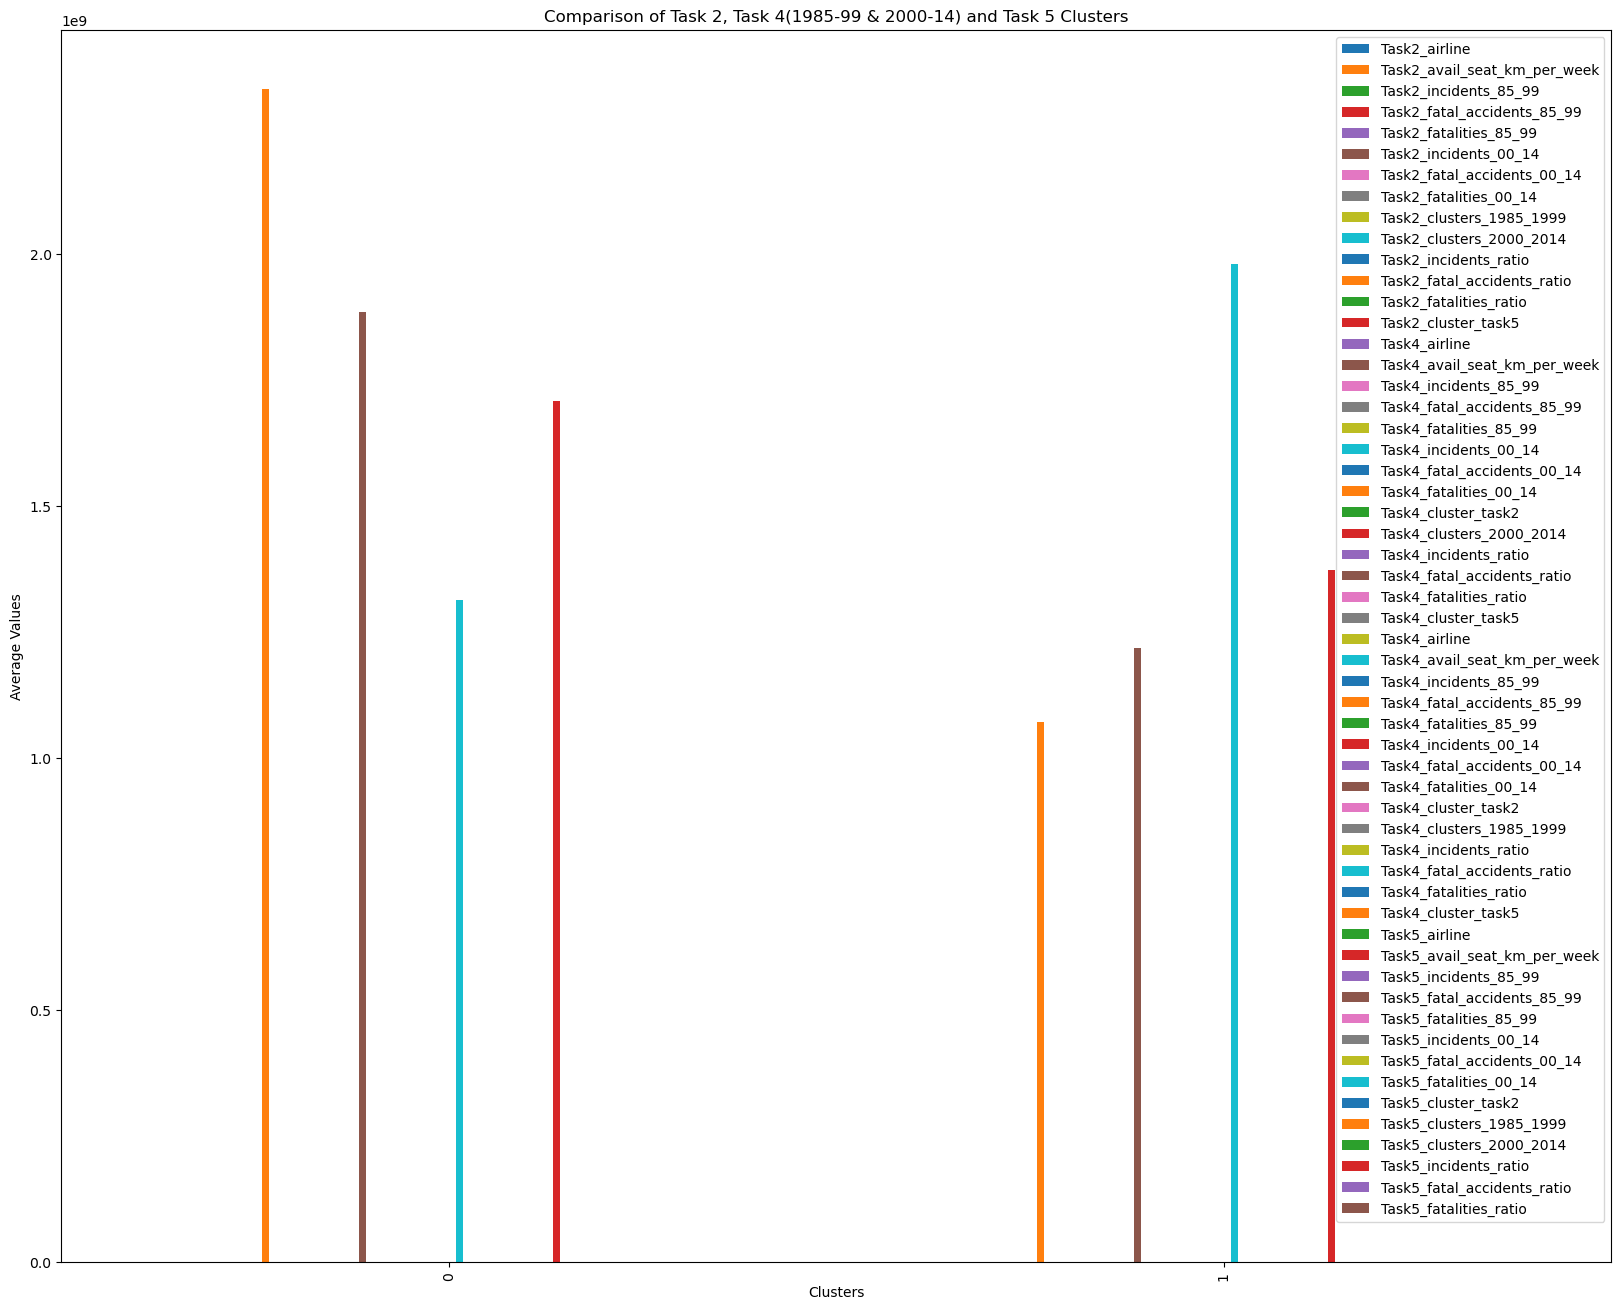

In [53]:
# Plotting the comparison
comparison.plot(kind='bar', figsize=(20, 16))
plt.xlabel('Clusters')
plt.ylabel('Average Values')
plt.title('Comparison of Task 2, Task 4(1985-99 & 2000-14) and Task 5 Clusters')
#plt.legend(loc='upper right')
plt.show()

##### Finding the airline names from different clustering tasks

In [54]:
file_path = os.path.join(os.getcwd(), 'airline-safety.csv')  
df_as = pd.read_csv(file_path)
airline_names = df_as[['airline']]
airline_names_df2 = airline_names.rename(columns={'airline': 'airline names'})
df_airnames = pd.concat([df_airline_safety, airline_names_df2], axis=1)

In [55]:
df_airnames.columns

Index(['airline', 'avail_seat_km_per_week', 'incidents_85_99',
       'fatal_accidents_85_99', 'fatalities_85_99', 'incidents_00_14',
       'fatal_accidents_00_14', 'fatalities_00_14', 'cluster_task2',
       'clusters_1985_1999', 'clusters_2000_2014', 'incidents_ratio',
       'fatal_accidents_ratio', 'fatalities_ratio', 'cluster_task5',
       'airline names'],
      dtype='object')

In [56]:
cluster_task2_airline_names = df_airnames.groupby('cluster_task2')['airline names'].unique()

print('Clustered airline names according to Task 2')
# Print the airline names classwise
for cluster, names in cluster_task2_airline_names.items():
    print("Cluster", cluster, "Airline Names:")
    name_list = list(names)
    print(name_list)
    print()

Clustered airline names according to Task 2
Cluster 0 Airline Names:
['Aeroflot*', 'Air France', 'American*', 'China Airlines', 'Delta / Northwest*', 'Ethiopian Airlines', 'Garuda Indonesia', 'Kenya Airways', 'Malaysia Airlines', 'Pakistan International', 'TAM', 'Turkish Airlines', 'United / Continental*', 'US Airways / America West*']

Cluster 1 Airline Names:
['Aer Lingus', 'Aerolineas Argentinas', 'Aeromexico*', 'Air Canada', 'Air India*', 'Air New Zealand*', 'Alaska Airlines*', 'Alitalia', 'All Nippon Airways', 'Austrian Airlines', 'Avianca', 'British Airways*', 'Cathay Pacific*', 'Condor', 'COPA', 'Egyptair', 'El Al', 'Finnair', 'Gulf Air', 'Hawaiian Airlines', 'Iberia', 'Japan Airlines', 'KLM*', 'Korean Air', 'LAN Airlines', 'Lufthansa*', 'Philippine Airlines', 'Qantas*', 'Royal Air Maroc', 'SAS*', 'Saudi Arabian', 'Singapore Airlines', 'South African', 'Southwest Airlines', 'Sri Lankan / AirLanka', 'SWISS*', 'TACA', 'TAP - Air Portugal', 'Thai Airways', 'Vietnam Airlines', 'Virg

In [57]:
cluster_task5_airline_names = df_airnames.groupby('cluster_task5')['airline names'].unique()

print('Clustered airline names according to Task 5')
# Print the airline names classwise
for cluster, names in cluster_task5_airline_names.items():
    print("Cluster", cluster, "Airline Names:")
    name_list = list(names)
    print(name_list)
    print()

Clustered airline names according to Task 5
Cluster 0 Airline Names:
['Malaysia Airlines', 'Singapore Airlines']

Cluster 1 Airline Names:
['Aer Lingus', 'Aeroflot*', 'Aerolineas Argentinas', 'Aeromexico*', 'Air Canada', 'Air France', 'Air India*', 'Air New Zealand*', 'Alaska Airlines*', 'Alitalia', 'All Nippon Airways', 'American*', 'Austrian Airlines', 'Avianca', 'British Airways*', 'Cathay Pacific*', 'China Airlines', 'Condor', 'COPA', 'Delta / Northwest*', 'Egyptair', 'El Al', 'Ethiopian Airlines', 'Finnair', 'Garuda Indonesia', 'Gulf Air', 'Hawaiian Airlines', 'Iberia', 'Japan Airlines', 'Kenya Airways', 'KLM*', 'Korean Air', 'LAN Airlines', 'Lufthansa*', 'Pakistan International', 'Philippine Airlines', 'Qantas*', 'Royal Air Maroc', 'SAS*', 'Saudi Arabian', 'South African', 'Southwest Airlines', 'Sri Lankan / AirLanka', 'SWISS*', 'TACA', 'TAM', 'TAP - Air Portugal', 'Thai Airways', 'Turkish Airlines', 'United / Continental*', 'US Airways / America West*', 'Vietnam Airlines', 'Virg

In [58]:
combined_clusters = df_airnames.groupby(['clusters_1985_1999', 'clusters_2000_2014'])['airline names'].unique()

# Print the airline names cluster-wise as a list
for clusters, names in combined_clusters.items():
    print("Clusters:", clusters)
    name_list = list(names)
    print(name_list)
    print()

Clusters: (0, 0)
['Air India*', 'Avianca', 'Delta / Northwest*', 'Egyptair', 'Garuda Indonesia', 'Japan Airlines', 'Korean Air', 'Pakistan International', 'Saudi Arabian', 'SWISS*', 'Thai Airways', 'United / Continental*', 'US Airways / America West*']

Clusters: (0, 1)
['China Airlines']

Clusters: (1, 0)
['Aer Lingus', 'Aeroflot*', 'Aerolineas Argentinas', 'Aeromexico*', 'Air Canada', 'Air New Zealand*', 'Alaska Airlines*', 'Alitalia', 'All Nippon Airways', 'Austrian Airlines', 'British Airways*', 'Cathay Pacific*', 'Condor', 'COPA', 'El Al', 'Ethiopian Airlines', 'Finnair', 'Gulf Air', 'Hawaiian Airlines', 'Iberia', 'KLM*', 'LAN Airlines', 'Lufthansa*', 'Philippine Airlines', 'Qantas*', 'Royal Air Maroc', 'SAS*', 'Singapore Airlines', 'South African', 'Southwest Airlines', 'Sri Lankan / AirLanka', 'TACA', 'TAP - Air Portugal', 'Turkish Airlines', 'Vietnam Airlines', 'Virgin Atlantic', 'Xiamen Airlines']

Clusters: (1, 1)
['Air France', 'American*', 'Kenya Airways', 'Malaysia Airline

### Conclusion

It offers details on different airlines' safety records over the years 1985–1999 and 2000–2014 based on Task 2 data.

Weekly available seat miles, occurrences, fatal accidents, fatalities, and other rates are some of the variables in the data set.

When I examine the data, I notice the following:

Cluster characteristics: The dataset seems to have been grouped into clusters depending on the safety records of the airlines. Task 2 defines two clusters, with cluster 1 and cluster 2 each having unique attributes.

It offers details on different airlines' safety records over the years 1985–1999 and 2000–2014 based on Task 2 data.

Weekly available seat miles, occurrences, fatal accidents, fatalities, and other rates are some of the variables in the data set.

When I examine the data, I notice the following:

Cluster characteristics: The dataset seems to have been grouped into clusters depending on the safety records of the airlines. Task 2 defines two clusters, with cluster 1 and cluster 2 each having unique attributes.

# A clustering analysis on the USArrests data

In [59]:
file_path = os.path.join(os.getcwd(), 'USArrests.csv')  
df_USArrests = pd.read_csv(file_path)

### About the dataset

A compilation of American crime data is available in the USArrests dataset. For each of the 50 US states in 1973, information on four variables is provided.

The variables in the dataset are described as follows:

1. Homicide: The number of homicide arrests per 100,000 people in each state is represented by this variable. Displays the number of homicides in each state.

2. Assault: The assault variable reflects the rate of assault in each province and represents the number of assault arrests per 100,000 people in each state.

3. Rape: This variable displays the proportion of rape arrests in each state per 100,000 people. depicts the number of rapes that have been reported in each state.

4. UrbanPop: The UrbanPop variable describes the percentage of the population in each state that lives in urban areas. It provides an indication of the level of urbanization or urban population density in each state.


### Aim

Based on their criminal features (homicide, assault, and rape) and degree of urbanisation (UrbanPop), similar circumstances are grouped in cluster analysis of USAarrests data to find patterns and detect trends.

By using cluster analysis, it is possible to learn more about the underlying structure of the data set and discover connections between different states.

The following objectives may be included in a cluster analysis of USArrests data:

Identification of similar circumstances: Grouping enables the identification of states that exhibit comparable patterns in the numbers of urban residents and crime rates. Understanding geographical parallels or variances in crime and urbanisation can be aided by this knowledge.

States can be divided into several groups according to their levels of urbanisation and crime by using grouping techniques. This may result in a more complex comprehension of various situational kinds and their traits.

Identify outliers: Cluster analysis helps locate instances that dramatically depart from the overall trends seen in the collection. These outliers can have distinctive characteristics that call for additional research.

Support for decision-making: Clustering results can be used to pinpoint states with comparable crime trajectories and levels of urbanisation and can offer data for planning policies, allocating resources, or focusing actions. Understanding the common problems and requirements of various governmental organisations might be useful.

### Methodology

Based on how similar the data points are, a technique called cluster analysis can be used to find groupings or clusters within a data set.

Cluster analysis can be used in the context of the USArrests dataset to reveal similarities and variations between states depending on factors linked to crime.

The following is a general procedure for performing cluster analysis on USArrests data:

1. Start by loading the USArrests dataset and carrying out the required data pretreatment procedures. Taking care of missing values, scaling variables as appropriate, and making sure the data is in a format suited for cluster analysis are all examples of this.

2. Feature selection: Select which dataset features will be used in the cluster analysis.In the dataset there are four variables in this scenario: homicide, assault, rape, and urban pop. Depending on the research question or goal, he or she may decide to employ each of the four variables individually or as a group.

3. The Clustering Method Choose a clustering algorithm that is suited for this analysis. There are various algorithms, such as B. K-Means, hierarchical clustering, and DBSCAN. The qualities of the data and the goals of this study will determine which algorithm is used.

4. Quantify the quantity of clusters: Decide how many clusters to use. This may be determined based on local knowledge, commercial requirements, or the application of techniques like the elbow approach or silhouette analysis to find an optimal number of clusters.

5. Use clustering algorithm: Use the dataset with the chosen clustering algorithm. Based on the closeness of each data point's attributes, the algorithm places each data point—which in this case represents a state—into a particular cluster.

6. Interpret and analyse the results: After the clustering algorithm has assigned states to the clusters, interpret and examine the outcomes to comprehend the characteristics of each cluster. Analyse trends, contrasts, and similarities amongst groups in relation to criminal tendencies. Results can be interpreted and communicated more easily using visualisations like scatter plots, heatmaps, or cluster profiles.

7. Assess and enhance: Assess the calibre and reliability of the cluster results. If necessary, fine-tune the analysis by changing the parameters, experimenting with various methods, or taking into account more variables to enhance the clustering outcome.

In [60]:
# Check for null or NaN values in the DataFrame
missing_values = df_USArrests.isnull().sum()
print(missing_values)

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64


There is no missing values. So no data is dropped or replaced.

##### Visualization of the data

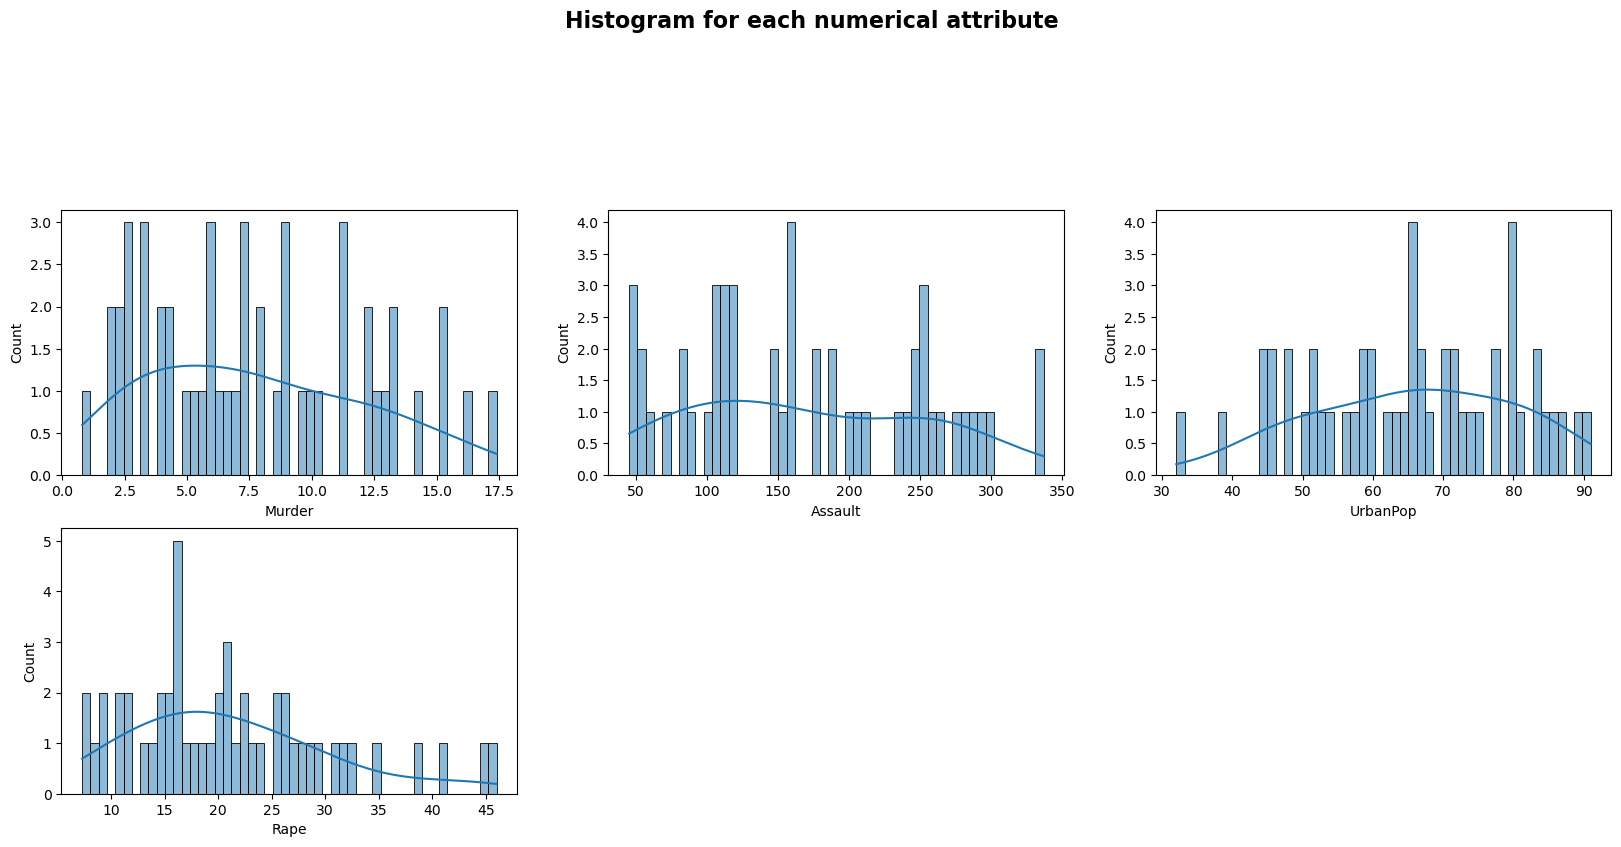

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a figure with subplots for each numerical feature
fig, axs = plt.subplots(ncols=3, nrows=5, figsize=(20, 20))

# set the title for the figure
fig.suptitle('Histogram for each numerical attribute', fontweight='bold', fontsize=16)

# iterate through the columns and plot the histogram using seaborn
for i, column in enumerate(df_USArrests.select_dtypes(include=['float64', 'int64']).columns):
    sns.histplot(data=df_USArrests, x=column, kde=True, ax=axs[i//3, i%3], bins=50)

# remove the empty subplots
for i in range(df_USArrests.select_dtypes(include=['float64', 'int64']).shape[1], 15):
    fig.delaxes(axs[i//3, i%3])

# display the plot
plt.show()

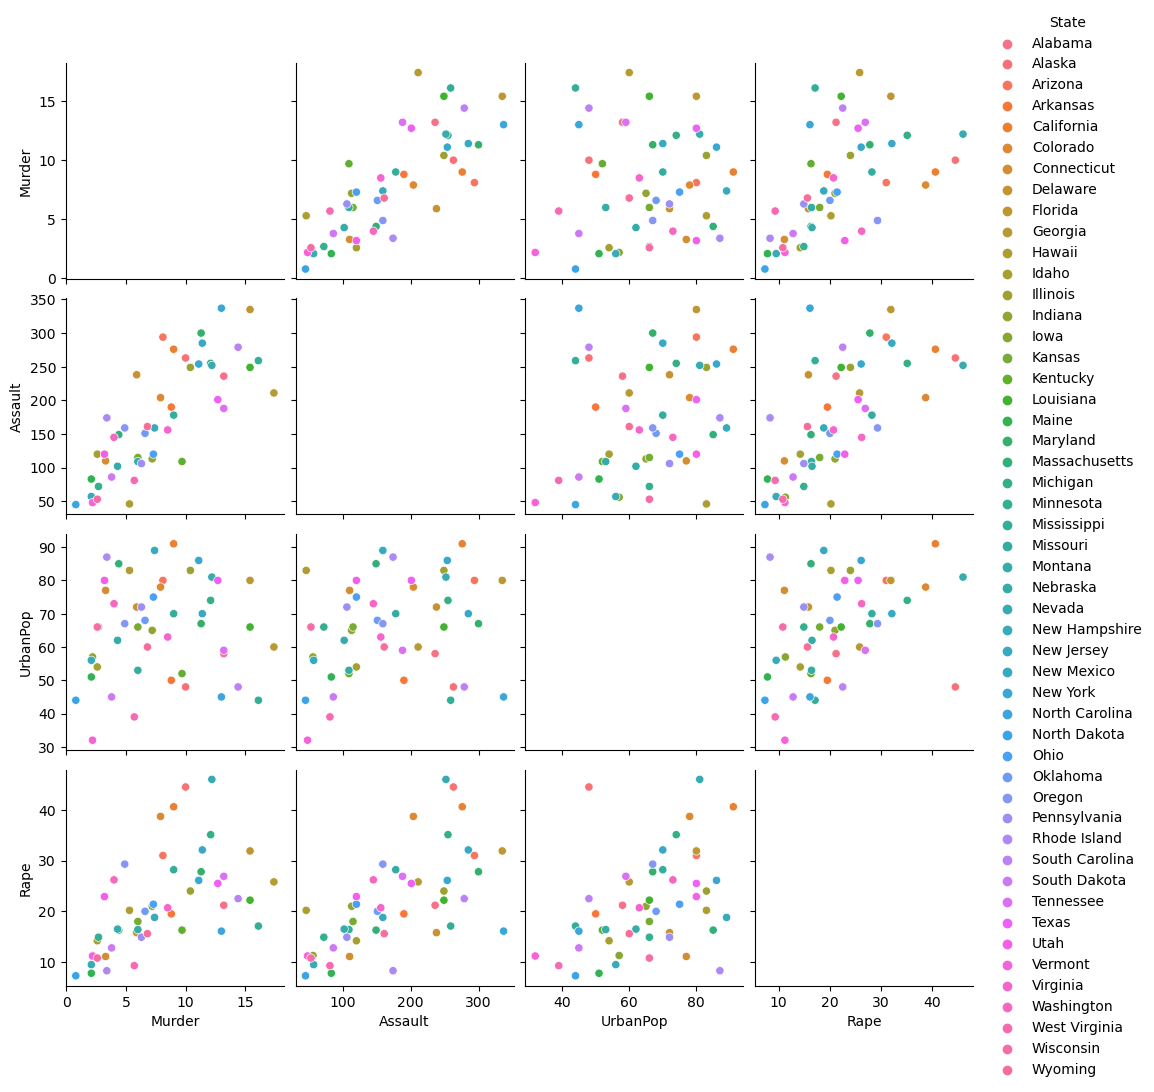

In [62]:
sns.pairplot(df_USArrests[['State', 'Murder', 'Assault', 'UrbanPop', 'Rape']], hue='State')
plt.show()

A double plot with colours based on the state variable is produced using the modified code that is provided.

For each circumstance in the dataset, the dual plot shows the correlations between the variables homicide, assault, urban population, and rape.

The association between two variables is represented by each scatter plot in the pair plot. The distribution of each variable is displayed separately on the double plot's diagonal.

Each data point in the scatter plots is given a unique colour that stands in for a particular state by adding colours based on the State variable. This enables the discovery and comparison of patterns and correlations between variables in various contexts.

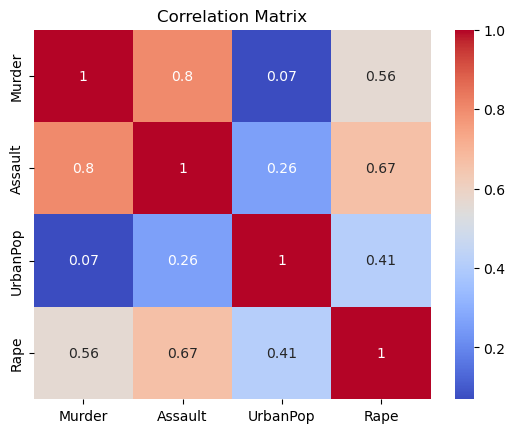

In [63]:
# Calculate the correlation matrix
correlation_matrix = df_USArrests.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [64]:
correlation_matrix

Murder   Assault  UrbanPop      Rape
Murder    1.000000  0.801873  0.069573  0.563579
Assault   0.801873  1.000000  0.258872  0.665241
UrbanPop  0.069573  0.258872  1.000000  0.411341
Rape      0.563579  0.665241  0.411341  1.000000

- Homicide and aggression: With a correlation value of 0.801873, there is a significant positive link between homicide and aggression. This demonstrates that states with high rates of homicide also have high rates of assault.

- Murder and UrbanPop: 0.069573 is the correlation coefficient between murder and urban pop, which is rather low. This shows that the percentage of the population that lives in urban regions and the rate of homicide have little to no linear relationship.

- Homicide and rape: The link between homicide and rape is somewhat positive, with a correlation coefficient of 0.563579. This shows that higher reported rape rates are also more common in states with higher homicide rates.

- Assault and UrbanPop: The correlation between Assault and UrbanPop has a correlation coefficient of 0.258872, which is likewise not very high. This shows that the percentage of the population that lives in urban areas and attack rates have little to no linear relationship.

- Rape and Aggression: With a correlation coefficient of 0.665241 between the two crimes, rape and aggression have a very strong positive link. This implies that states with greater assault rates also have higher reported rape rates.

- UrbanPop and Rape: With a correlation coefficient of 0.411341, there is a moderate link between UrbanPop and Rape. This implies that there might be a connection between the proportion of the population that resides in urban regions and the frequency of reported rape, however the strength of the association is unclear.

Overall, the correlation matrix sheds light on the connections between the elements of the American arrest record. While the correlations between factors such as UrbanPop are not very significant, it implies substantial or somewhat favourable associations between homicide and assault, homicide and rape, and assault and rape.

In [65]:
# Remove the state column if it exists (optional)
df_USArrests_numcols = df_USArrests.drop('State', axis=1)

##### Plotting the dendogram

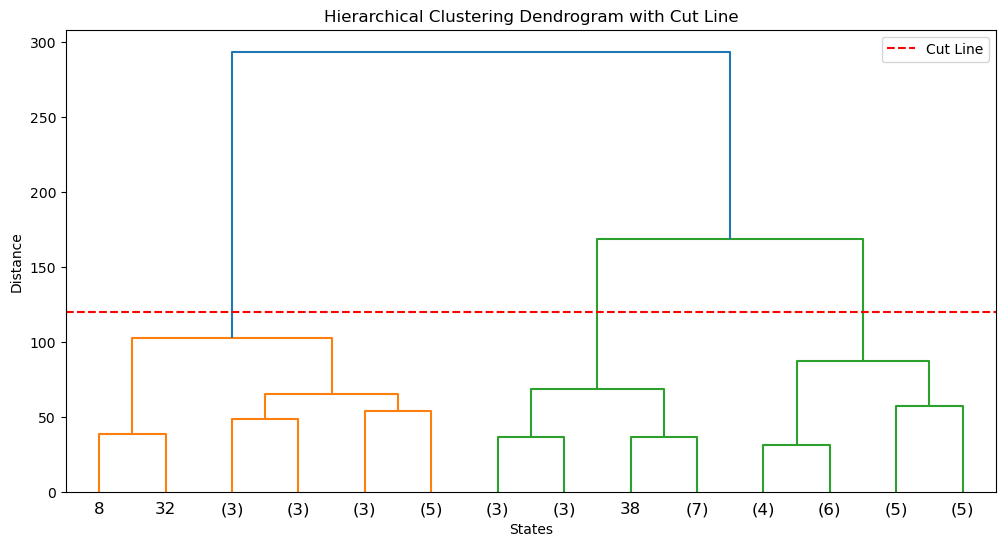

In [66]:
# Import the necessary libraries

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Perform hierarchical clustering with complete linkage and Euclidean distance
linkage_matrix = linkage(df_USArrests_numcols, method='complete', metric='euclidean')


# Cut the dendrogram to obtain three distinct clusters
clusters = fcluster(linkage_matrix, t=3, criterion='maxclust')

# Print the states and their corresponding cluster labels
#df_clusters = pd.DataFrame({'State': df_USArrests['State'], 'Cluster': clusters})
#print(df_clusters)

# Plot the dendrogram with the cut line
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.axhline(y=120, color='r', linestyle='--', label='Cut Line')
plt.xlabel('States')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram with Cut Line')
plt.legend()
plt.show()

In [67]:
df_USArrests['Cluster'] = clusters

# Print the states and their corresponding cluster labels
df_clusters = pd.DataFrame({'State': df_USArrests['State'], 'Cluster': df_USArrests['Cluster']})

##### Finding the characteristics of the clusters

In [68]:
# Display the states and their corresponding clusters
clusters_df = df_USArrests.groupby('Cluster').apply(lambda x: ', '.join(x['State']))
for cluster, states in clusters_df.iteritems():
    print(f'Cluster {cluster}: {states}')

# Describe the characteristics of each cluster
for cluster in range(1, 4):  # Assuming 3 clusters
    cluster_data = df_USArrests[df_USArrests['Cluster'] == cluster].drop('Cluster', axis=1)
    cluster_stats = cluster_data.describe()
    print(f'\nCluster {cluster} Characteristics:')
    print(cluster_stats)


Cluster 1: Alabama, Alaska, Arizona, California, Delaware, Florida, Illinois, Louisiana, Maryland, Michigan, Mississippi, Nevada, New Mexico, New York, North Carolina, South Carolina
Cluster 2: Arkansas, Colorado, Georgia, Massachusetts, Missouri, New Jersey, Oklahoma, Oregon, Rhode Island, Tennessee, Texas, Virginia, Washington, Wyoming
Cluster 3: Connecticut, Hawaii, Idaho, Indiana, Iowa, Kansas, Kentucky, Maine, Minnesota, Montana, Nebraska, New Hampshire, North Dakota, Ohio, Pennsylvania, South Dakota, Utah, Vermont, West Virginia, Wisconsin

Cluster 1 Characteristics:
         Murder     Assault   UrbanPop       Rape
count  16.00000   16.000000  16.000000  16.000000
mean   11.81250  272.562500  68.312500  28.375000
std     2.79592   31.052576  15.490723   9.602882
min     5.90000  236.000000  44.000000  15.800000
25%    10.30000  251.250000  55.500000  21.950000
50%    11.75000  261.000000  71.000000  26.950000
75%    13.50000  287.250000  80.250000  32.850000
max    16.10000  337

The states and traits of each cluster are as follows, as determined by the clustering results:

Group 1: Nevada, New Mexico, North Carolina, South Carolina, Illinois, Louisiana, Maryland, Michigan, Mississippi, Alabama, Alaska, Arizona, California, Delaware, Florida, Illinois, Louisiana, Maryland, Michigan, and

- These states have greater rates of homicide, assault, urban population, and rape than the other groupings.

- They have a greater proportion of the urban population and relatively higher crime rates.

Group 2 consists of the following states: Tennessee, Texas, Virginia, Washington, Wyoming, Massachusetts, Missouri, New Jersey, Oklahoma, Oregon, Rhode Island, and Arkansas.

- The scores for homicide, assault, urban population, and rape in these states are middle.

- Their urban populations and crime rates are typical.

Connecticut, Hawaii, Idaho, Indiana, Iowa, Kansas, Kentucky, Maine, Minnesota, Montana, Nebraska, New Hampshire, North Dakota, Ohio, Pennsylvania, South Dakota, Utah, Vermont, West Virginia, and Wisconsin make up group number three.

Compared to other categories, these states have lower rates of homicide, assault, urban population, and rape.

- They have a lower percentage of urban residents and, in comparison, lower crime rates.

Based on commonalities between states' rates of homicide, assault, and rape, as well as their proportions of urban residents, clusters were developed.

In [69]:
from sklearn.preprocessing import StandardScaler
# Scale the variables for clustering
scaler = StandardScaler()
df_USArrests_numcols_scaled = scaler.fit_transform(df_USArrests_numcols)

##### Plotting the dendogram on scaled data

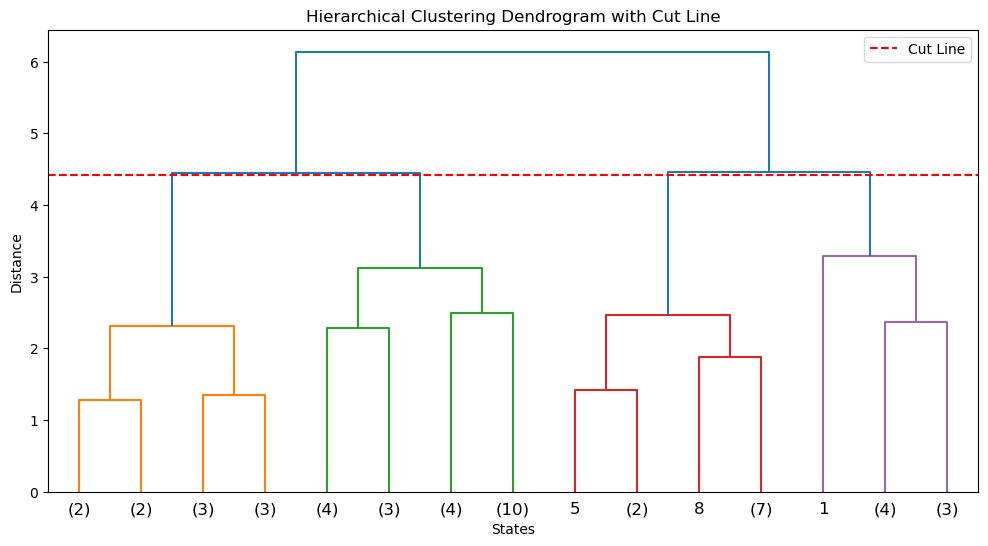

In [70]:
# Perform hierarchical clustering with complete linkage and Euclidean distance on the scaled features
linkage_matrix_scaled = linkage(df_USArrests_numcols_scaled, method='complete', metric='euclidean')

# Cut the dendrogram to obtain three distinct clusters
clusters = fcluster(linkage_matrix_scaled, t=3, criterion='maxclust')

# Print the states and their corresponding cluster labels
df_clusters = pd.DataFrame({'State': df_USArrests['State'], 'Cluster': clusters})
#print(df_clusters)

# Plot the dendrogram with the cut line
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix_scaled, truncate_mode='level', p=3)
plt.axhline(y=4.42, color='r', linestyle='--', label='Cut Line')
plt.xlabel('States')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram with Cut Line')
plt.legend()
plt.show()

In [71]:
# Cut the dendrogram to get three clusters
cut_height = 6  # Adjust the cut height as needed

# Assign clusters to states
df_USArrests['Cluster'] = clusters

# Display the states and their corresponding clusters
clusters_df = df_USArrests.groupby('Cluster').apply(lambda x: ', '.join(x['State']))
for cluster, states in clusters_df.iteritems():
    print(f'Cluster {cluster}: {states}')

# Describe the characteristics of each cluster
for cluster in range(1, 4):  # Assuming 3 clusters
    cluster_data = df_USArrests[df_USArrests['Cluster'] == cluster].drop('Cluster', axis=1)
    cluster_stats = cluster_data.describe()
    print(f'\nCluster {cluster} Characteristics:')
    print(cluster_stats)

Cluster 1: Arkansas, Connecticut, Delaware, Hawaii, Idaho, Indiana, Iowa, Kansas, Kentucky, Maine, Massachusetts, Minnesota, Missouri, Montana, Nebraska, New Hampshire, New Jersey, North Dakota, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, South Dakota, Utah, Vermont, Virginia, Washington, West Virginia, Wisconsin, Wyoming
Cluster 2: Arizona, California, Colorado, Florida, Illinois, Maryland, Michigan, Nevada, New Mexico, New York, Texas
Cluster 3: Alabama, Alaska, Georgia, Louisiana, Mississippi, North Carolina, South Carolina, Tennessee

Cluster 1 Characteristics:
          Murder     Assault   UrbanPop       Rape
count  31.000000   31.000000  31.000000  31.000000
mean    5.003226  116.483871  63.838710  16.338710
std     2.383902   48.059596  14.210552   5.802395
min     0.800000   45.000000  32.000000   7.300000
25%     2.950000   82.000000  53.500000  11.250000
50%     4.900000  113.000000  66.000000  16.300000
75%     6.700000  153.500000  72.500000  20.100000
max     9.70

The clustering outcomes alter when the variable is scaled to have a mean of zero and one standard deviation.

Variable ranges are no longer dominant in the grouping process as a result of scaling variables. Smaller scale variables do not outweigh larger scale ones. Scaling makes certain that each variable makes a proportionate contribution to the clustering procedure.

Variable scaling, in my opinion, is helpful for hierarchical clustering. This makes sure that the grouping is not skewed by the variable's initial scale. The algorithm can concentrate on differences and relative patterns in the data rather than being impacted by the absolute magnitudes of the variables by scaling all variables to the same scale.

In this instance, scaling the variables is advised to produce more accurate and insightful grouping results.

In [72]:
df_USArrests.columns

Index(['State', 'Murder', 'Assault', 'UrbanPop', 'Rape', 'Cluster'], dtype='object')

##### Clustering with PCA

Cluster 1: Arkansas, Connecticut, Delaware, Hawaii, Idaho, Indiana, Iowa, Kansas, Kentucky, Maine, Massachusetts, Minnesota, Missouri, Montana, Nebraska, New Hampshire, New Jersey, North Dakota, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, South Dakota, Utah, Vermont, Virginia, Washington, West Virginia, Wisconsin, Wyoming
Cluster 2: Alabama, Alaska, Georgia, Louisiana, Mississippi, North Carolina, South Carolina, Tennessee
Cluster 3: Arizona, California, Colorado, Florida, Illinois, Maryland, Michigan, Nevada, New Mexico, New York, Texas

Cluster 1 Characteristics:
          Murder     Assault   UrbanPop       Rape  Cluster_k
count  31.000000   31.000000  31.000000  31.000000       31.0
mean    5.003226  116.483871  63.838710  16.338710        0.0
std     2.383902   48.059596  14.210552   5.802395        0.0
min     0.800000   45.000000  32.000000   7.300000        0.0
25%     2.950000   82.000000  53.500000  11.250000        0.0
50%     4.900000  113.000000  66.000000  16.3000

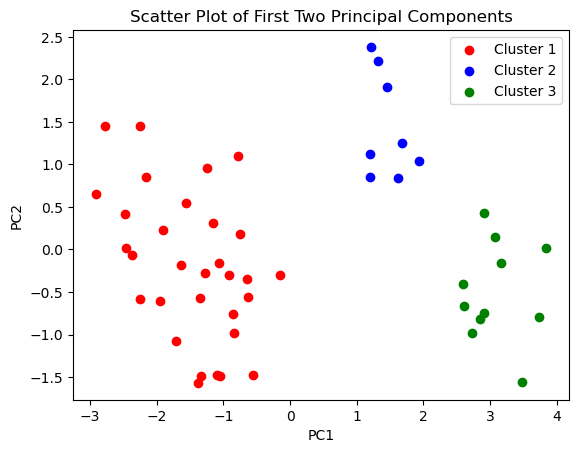

In [81]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt

# Exclude the 'State' column
df_numeric = df_USArrests.drop('State', axis=1)

# Perform imputation using median
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

# Standardize the data
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df_imputed.columns)

# Perform PCA on the standardized data
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_standardized)

# Perform hierarchical clustering on the first two principal components
dist_matrix = linkage(pca_components, method='complete', metric='euclidean')
clusters = fcluster(dist_matrix, 3, criterion='maxclust')

# Assign cluster labels to the original dataset
df_USArrests['Cluster'] = clusters

# Display the states and their corresponding clusters
clusters_df = df_USArrests.groupby('Cluster').apply(lambda x: ', '.join(x['State']))
for cluster, states in clusters_df.iteritems():
    print(f'Cluster {cluster}: {states}')

# Describe the characteristics of each cluster
for cluster in range(1, 4):
    cluster_data = df_USArrests[df_USArrests['Cluster'] == cluster].drop('Cluster', axis=1)
    cluster_stats = cluster_data.describe()
    print(f'\nCluster {cluster} Characteristics:')
    print(cluster_stats)

# Scatter plot of the first two principal components with cluster coloring
plt.scatter(pca_components[clusters == 1, 0], pca_components[clusters == 1, 1], c='red', label='Cluster 1')
plt.scatter(pca_components[clusters == 2, 0], pca_components[clusters == 2, 1], c='blue', label='Cluster 2')
plt.scatter(pca_components[clusters == 3, 0], pca_components[clusters == 3, 1], c='green', label='Cluster 3')
plt.legend()

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of First Two Principal Components')
plt.show()


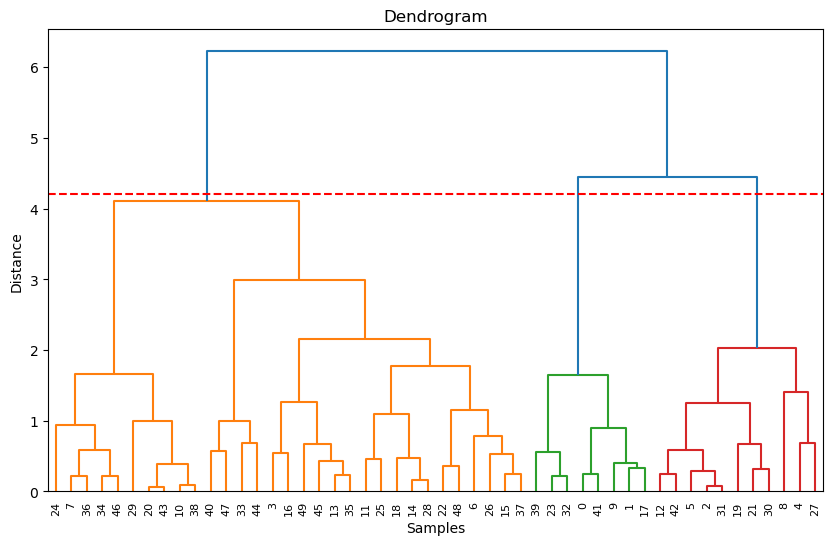

In [74]:
# Generate the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(dist_matrix)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Dendrogram')

# Cut the dendrogram at a height resulting in three clusters
plt.axhline(y=4.2, color='r', linestyle='--')
plt.show()

##### Comparison

Observe that the composition of the clusters and the states within each cluster are the same in the clustering results before and after applying PCA (Principal Component Analysis), according to the information provided.

The properties of the clusters do vary slightly, though.

Prior to PCA:

- Group 1 consists of 31 states with rape, homicide, and assault rates that are comparatively low.

- Group 2 consists of 11 states with greater homicide, assault, urban population, and rape ratings.

8 examples in Cluster 3 have intermediate values for the specified variables.

Following PCA

- Cluster 1 is still composed of 31 states with the same characteristics as before.

- Clusters 2 and 3 are now located differently than they were in the pre-APC era.

The values of the variables are generally similar when comparing the traits of the clusters before and after PCA.

The mean, standard deviation, and quartile values of the variables in each group, however, might vary slightly.

Overall, using PCA in this situation had little impact on the clustering outcomes. This effectively assisted in reducing the dimensionality of the data while making it simpler to analyse and visualise the clusters by maintaining the relative links between the states.

In [75]:
df_USArrests.columns

Index(['State', 'Murder', 'Assault', 'UrbanPop', 'Rape', 'Cluster'], dtype='object')

##### Clustering with K-means

Cluster 0: Arkansas, Connecticut, Delaware, Hawaii, Idaho, Indiana, Iowa, Kansas, Kentucky, Maine, Massachusetts, Minnesota, Missouri, Montana, Nebraska, New Hampshire, New Jersey, North Dakota, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, South Dakota, Utah, Vermont, Virginia, Washington, West Virginia, Wisconsin, Wyoming
Cluster 1: Alabama, Alaska, Georgia, Louisiana, Mississippi, North Carolina, South Carolina, Tennessee
Cluster 2: Arizona, California, Colorado, Florida, Illinois, Maryland, Michigan, Nevada, New Mexico, New York, Texas

Cluster 0 Characteristics:
          Murder     Assault   UrbanPop       Rape  Cluster
count  31.000000   31.000000  31.000000  31.000000     31.0
mean    5.003226  116.483871  63.838710  16.338710      1.0
std     2.383902   48.059596  14.210552   5.802395      0.0
min     0.800000   45.000000  32.000000   7.300000      1.0
25%     2.950000   82.000000  53.500000  11.250000      1.0
50%     4.900000  113.000000  66.000000  16.300000      1.0


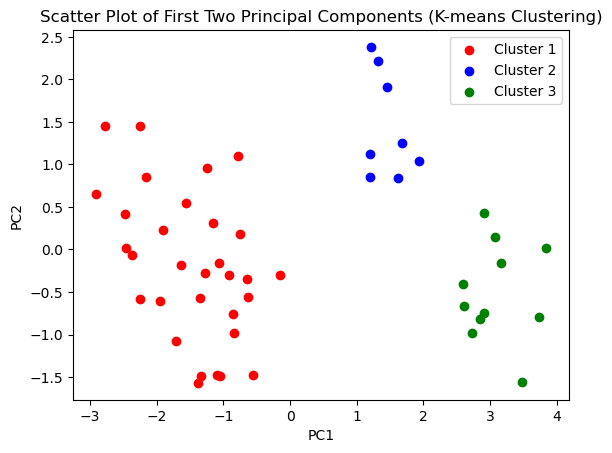

In [82]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt


# Perform hierarchical clustering on the first two principal components
clusters_hierarchical = clusters

# Get group means from hierarchical clustering
group_means = []
for cluster in range(1, 4):
    cluster_indices = np.where(clusters_hierarchical == cluster)[0]
    cluster_mean = np.mean(pca_components[cluster_indices], axis=0)
    group_means.append(cluster_mean)

# Perform K-means clustering using the group means as initial centroids
kmeans = KMeans(n_clusters=3, init=np.array(group_means), n_init=1, random_state=5508)
clusters_kmeans = kmeans.fit_predict(pca_components)

# Assign cluster labels to the original dataset
df_USArrests['Cluster_k'] = clusters_kmeans

# Display the states and their corresponding clusters
clusters_df = df_USArrests.groupby('Cluster_k').apply(lambda x: ', '.join(x['State']))
for cluster, states in clusters_df.iteritems():
    print(f'Cluster {cluster}: {states}')

# Describe the characteristics of each cluster
for cluster in range(0, 3):
    cluster_data = df_USArrests[df_USArrests['Cluster_k'] == cluster].drop('Cluster_k', axis=1)
    cluster_stats = cluster_data.describe()
    print(f'\nCluster {cluster} Characteristics:')
    print(cluster_stats)

# Scatter plot of the first two principal components with cluster coloring
# Scatter plot of the first two principal components with cluster coloring
plt.scatter(pca_components[clusters == 1, 0], pca_components[clusters == 1, 1], c='red', label='Cluster 1')
plt.scatter(pca_components[clusters == 2, 0], pca_components[clusters == 2, 1], c='blue', label='Cluster 2')
plt.scatter(pca_components[clusters == 3, 0], pca_components[clusters == 3, 1], c='green', label='Cluster 3')
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of First Two Principal Components (K-means Clustering)')
plt.show()


Let's assess the outcomes of hierarchical clustering and k-means clustering in the context of the USArrests data clustering based on the aforementioned result:

Hierarchical clustering outcomes:

- Group 1: This category includes nations with lower rates of crime and smaller metropolitan populations. This cluster's characteristics point to circumstances that are comparatively safer.
- Group 2: This group consists of nations with urban populations and moderate crime rates.
- category 3: This category consists of states with higher rates of both urban and overall crime.

Results of K-Means clustering

- Cluster 0: States in this cluster have lower crime rates and more urban populations than those in cluster 1, the hierarchical cluster.
- Cluster 1: This cluster relates to cluster 2 of the hierarchy of nations with moderate levels of crime and urban populations.
- Cluster 2: This cluster contains states with greater crime rates and urban populations. It is compatible with cluster 3 of the hierarchical cluster.

Comparison of outcomes

Overall, it appears that both approaches' clustering results are consistent. According to the percentage of people living in cities and the rate of crime, states are categorised into three groups.

- Cluster labelling, where cluster numbering varies between hierarchical clustering and k-means clustering, is the key area of difference.
- It is crucial to keep in mind that the consistency and coherency of clusters should be evaluated in light of domain expertise and the analysis's particular goals.

Both approaches enable a better comprehension of the data set by providing data on various national groupings based on crime statistics.

### Conclusion

Both hierarchical clustering and k-means clustering provide reliable and significant groupings for USArrests data, according to a comparison of the results.

Regarding the traits and patterns seen in the data set, the clusters produced by the two approaches are comparable.

Without additional research or definite objectives, it will be challenging to say with certainty which strategy performs best given the similarities in cluster composition and features between the two approaches. Both approaches appear to be capable of reflecting states' varied percentages of urban residents and crime rates.